# Imports

In [1]:
# Standard visualization and analysis

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import unicodeit
import numpy as np
import pandas as pd

from ase.io import read, write

from ase.visualize import view

# Energy errors

from aseMolec import pltProps as pp
from aseMolec import anaAtoms as aa
from aseMolec import extAtoms as ea

#Visualize trajectories

import nglview as nv

# Analyse dynamics

from scipy.spatial.distance import cdist
from scipy.stats import gaussian_kde
from collections import Counter


- Universal plot settings

In [2]:
plt.rcdefaults()

In [3]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize': 14,              
    'axes.labelsize': 12,              
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,             
    'legend.fontsize': 12,            
    'figure.titlesize': 16,            
})

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#1f77b4", "#ff5733", "#2ca02c"])  # Custom colors

## Compare errors for training from scratch and fine tuning

    - Set up for the training from scratch and fine-tuning were identical other than the parameters that ensure fine-tuning from a foundation model set up

    - Due to the compute and time constraints we ran 100 epochs for training and fine-tuning respectively to get a representative comparison.

    Data was extracted from the model output files (logs etc)

    Base on validation set

**Check these are all the lowest values and which models they respond to!!!**

## Lowest validation RMSE values

### Fine Tuned:

Mixed 10 structures: `MACE_models/mace_10_training_run-3_stagetwo.model`

Mixed 20 structures: `MACE_models/mace_20_training_run-3.model`

Mixed 30 structures: `MACE_models/mace_30_training_run-3.model`

Confined only 10 structures: ``

Confined only 20 structures: `MACE_models/mace_20_confined_only_training_run-3_stagetwo.model`

Confined only 30 structures: `MACE_models/mace_30_confined_only_training_run-3.model`



### From Scratch (These were run on fastpcs: `/data/fast-pc-02/bw507/fine_tuning_assignment`): 

Mixed 10 structures: `MACE_models/mace_10_training_scratch_run-3_stagetwo.model`

Mixed 20 structures: `MACE_models/mace_20_training_scratch_run-3_stagetwo.model`

Mixed 30 structures: `MACE_models/mace_30_training_scratch_run-3_stagetwo.model`

Confined only 10 structures: `MACE_models/mace_10_training_scratch_run-3_stagetwo.model`

Confined only 20 structures: `MACE_models/mace_10_training_scratch_run-3_stagetwo.model`

Confined only 30 structures: `MACE_models/mace_10_training_scratch_run-3_stagetwo.model`




### Energy and Force errors for scratch training vs fine-tuning.

 - Data extracted from the logs

In [137]:
training_set_size = [10, 20, 30]


## Training from scratch errors

# Train from scratch - bulk and confined training data.

mace_scratch_energy_errors_mixed_training_set = [13.3, 11.7, 9.5]

mace_scratch_force_errors_mixed_training_set = [177.4, 149.8, 126.3]


# Train from scratch - confined training data only.

mace_scratch_energy_errors_confined_only_training_set = [17.4, 15.7, 11.9]

mace_scratch_force_errors_confined_only_training_set = [236.0, 278.0, 180.6]

# Test values for the 20 structures above was 15.0 and 198.5 respectively...


## Fine tuning errors

# Do I need to re-run the first one with 10:1 weighting for force to energy...

mace_fine_tuned_energy_errors_mixed_training_set = [10.1, 7.1, 6.2]

mace_fine_tuned_force_errors_mixed_training_set = [105.5, 78.1, 73.0]

# Do I need to train on the confined only for all training set sizes

## Replace the dummy values in the first entry in the list with actual values

mace_fine_tuned_energy_errors_confined_only_training_set = [13.0, 14.8, 5.7]

mace_fine_tuned_force_errors_confined_only_training_set = [152.7, 182.6, 101.1]

- Average differences

In [5]:
energy_mixed_average_diff = np.mean(np.array(mace_scratch_energy_errors_mixed_training_set) - np.array(mace_fine_tuned_energy_errors_mixed_training_set))

print(energy_mixed_average_diff)

force_mixed_average_diff = np.mean(np.array(mace_scratch_force_errors_mixed_training_set) - np.array(mace_fine_tuned_force_errors_mixed_training_set))

print(force_mixed_average_diff)

3.7000000000000006
65.63333333333334


In [6]:
energy_mixed_average_diff = np.mean(np.array(mace_scratch_energy_errors_confined_only_training_set) - np.array(mace_fine_tuned_energy_errors_confined_only_training_set))

print(energy_mixed_average_diff)

force_mixed_average_diff = np.mean(np.array(mace_scratch_force_errors_confined_only_training_set) - np.array(mace_fine_tuned_force_errors_confined_only_training_set))

print(force_mixed_average_diff)

3.833333333333332
86.06666666666668


## Plot for models trained on bulk and confined water structures

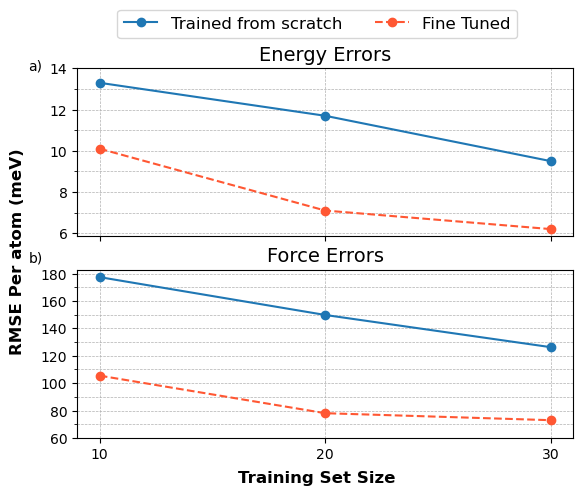

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(2, 1)

# Set the ticks and ticklabels for all axes
plt.setp((ax1, ax2), xticks=[10, 20, 30])

ax1.set_title('Energy Errors')
ax1.plot(training_set_size, mace_scratch_energy_errors_mixed_training_set, marker="o")
ax1.plot(training_set_size, mace_fine_tuned_energy_errors_mixed_training_set, marker="o", linestyle="--")
ax1.set_yticks([6,8,10,12,14])
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.set_title('Force Errors')
ax2.plot(training_set_size, mace_scratch_force_errors_mixed_training_set, marker="o")
ax2.plot(training_set_size, mace_fine_tuned_force_errors_mixed_training_set, marker="o", linestyle="--")
ax2.set_yticks([60,80,100,120,140,160,180])
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

fig.supxlabel('Training Set Size', fontweight='bold')
fig.supylabel('RMSE Per atom (meV)', fontweight='bold')
fig.legend(labels=['Trained from scratch', 'Fine Tuned'], loc="upper center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=12)

fig.text(0.06, 0.90, 'a)', ha='center', va='top', fontsize=10)
fig.text(0.06, 0.5, 'b)', ha='center', va='top', fontsize=10)


for ax in fig.get_axes():
    ax.label_outer()

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/errors_for_scratch_vs_fine_tuned_bulk_and_confined_training.png', dpi=300, bbox_inches='tight')

plt.show()

- Add figure for bulk and confined systems

## Plot for models only trained on confined water structures

Text(0.06, 0.51, 'b)')

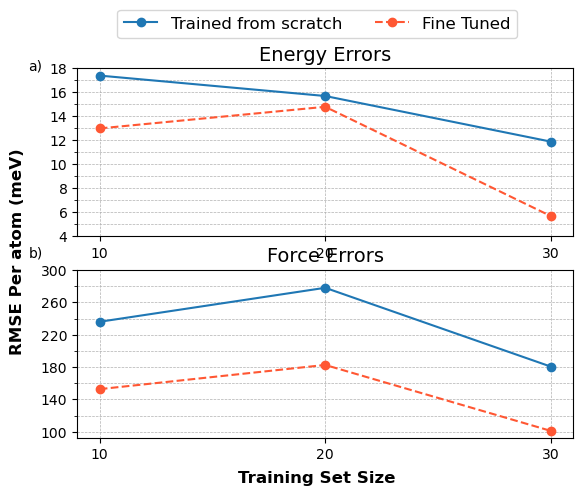

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(2, 1)

# Set the ticks and ticklabels for all axes
plt.setp((ax1, ax2), xticks=[10, 20, 30])

ax1.set_title('Energy Errors')
ax1.plot(training_set_size, mace_scratch_energy_errors_confined_only_training_set, marker="o")
ax1.plot(training_set_size, mace_fine_tuned_energy_errors_confined_only_training_set, marker="o", linestyle="--")
ax1.set_yticks([4,6,8,10,12,14, 16, 18])
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.set_title('Force Errors')
ax2.plot(training_set_size, mace_scratch_force_errors_confined_only_training_set, marker="o")
ax2.plot(training_set_size, mace_fine_tuned_force_errors_confined_only_training_set, marker="o", linestyle="--")
ax2.set_yticks([100,140,180,220,260,300])
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(20))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

fig.supxlabel('Training Set Size', fontweight='bold')
fig.supylabel('RMSE Per atom (meV)', fontweight='bold')
fig.legend(labels=['Trained from scratch', 'Fine Tuned'], loc="upper center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=12)

fig.text(0.06, 0.90, 'a)', ha='center', va='top', fontsize=10)
fig.text(0.06, 0.51, 'b)', ha='center', va='top', fontsize=10)

for ax in fig.get_axes():
    ax.label_outer()

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/errors_for_scratch_vs_fine_tuned_confined_only_training.png', dpi=300, bbox_inches='tight')


**This format looks good!**

In [138]:
plt.rcParams.update({
    'axes.titleweight': 'bold',        
    'axes.titlesize': 20,              
    'axes.labelsize': 20,              
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,             
    'legend.fontsize': 20,            
    'figure.titlesize': 20,            
})

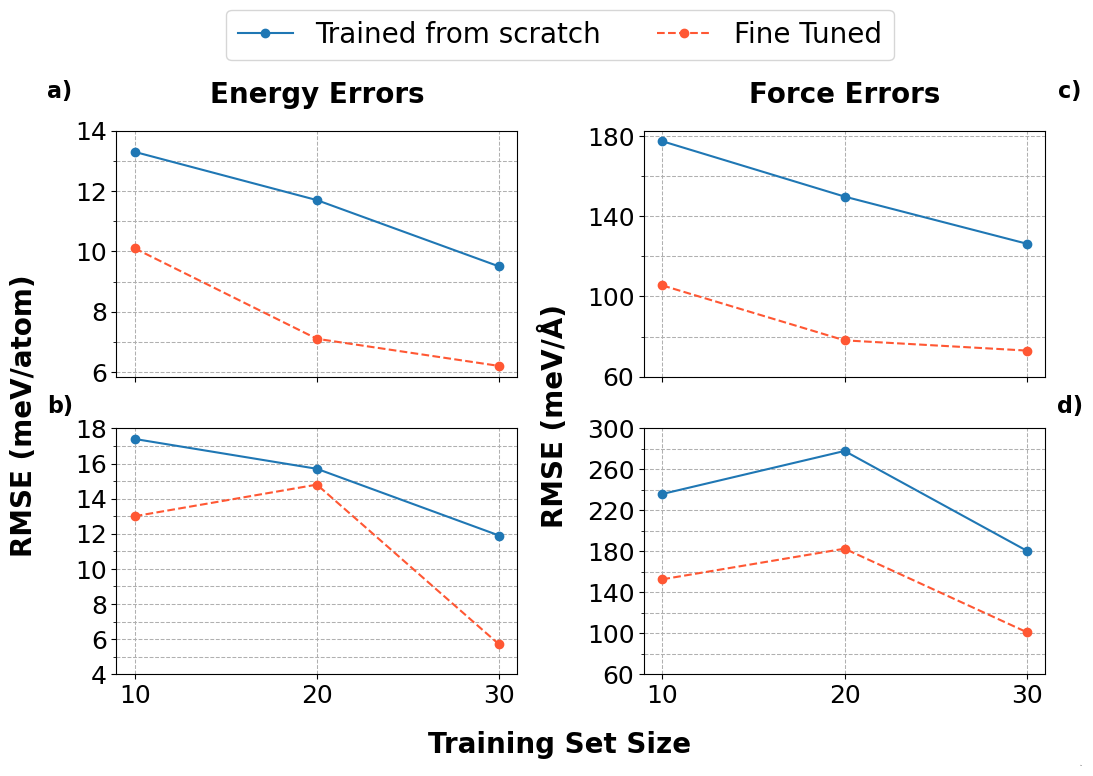

In [ ]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(10, 7), sharex = True)#, sharey='col')

plt.setp((ax1, ax3, ax2, ax4), xticks=[10, 20, 30])


ax1.set_title('Energy Errors', fontweight = "bold", pad = 20, fontsize=20)
ax1.plot(training_set_size, mace_scratch_energy_errors_mixed_training_set, marker="o")
ax1.plot(training_set_size, mace_fine_tuned_energy_errors_mixed_training_set, marker="o", linestyle="--")
ax1.set_yticks([6,8,10,12,14])
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.grid(True, which='both', linestyle='--', linewidth=0.75)

ax2.plot(training_set_size, mace_scratch_energy_errors_confined_only_training_set, marker="o")
ax2.plot(training_set_size, mace_fine_tuned_energy_errors_confined_only_training_set, marker="o", linestyle="--")
ax2.set_yticks([4,6,8,10,12,14, 16, 18])
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.grid(True, which='both', linestyle='--', linewidth=0.75)

# ax2.set_ylabel('RMSE Per atom (meV)', fontweight='bold',x=-0.00, fontsize = 16, loc = "top")

ax3.set_title('Force Errors', fontweight = "bold", pad = 20, fontsize=20)
ax3.plot(training_set_size, mace_scratch_force_errors_mixed_training_set, marker="o")
ax3.plot(training_set_size, mace_fine_tuned_force_errors_mixed_training_set, marker="o", linestyle="--")
ax3.set_yticks([60,100,140,180])
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(20))
ax3.grid(True, which='both', linestyle='--', linewidth=0.75)


fig.text(0.0, 0.98, 'a)', ha='center', va='top', fontsize=16, fontweight = "bold")
fig.text(0.0, 0.53, 'b)', ha='center', va='top', fontsize=16, fontweight = "bold")

ax4.plot(training_set_size, mace_scratch_force_errors_confined_only_training_set, marker="o")
ax4.plot(training_set_size, mace_fine_tuned_force_errors_confined_only_training_set, marker="o", linestyle="--")
ax4.set_yticks([60,100,140,180,220,260,300])
ax4.yaxis.set_minor_locator(ticker.MultipleLocator(20))
ax4.grid(True, which='both', linestyle='--', linewidth=0.75)

# ax4.set_ylabel('RMSE (meV/Å)', fontweight='bold', fontsize = 16, loc = "top")

fig.supxlabel('Training Set Size', fontweight='bold', fontsize = 20, y = 0.01)
# fig.supylabel('RMSE Per atom (meV)', fontweight='bold', x=0, fontsize = 16)
# fig.supylabel('RMSE (meV/Å)', fontweight='bold',x = 0.5, fontsize = 16)
fig.legend(labels=['Trained from scratch', 'Fine Tuned'], loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=2)

fig.text(1.01, 0.98, 'c)', ha='center', va='top', fontsize=16, fontweight = "bold")
fig.text(1.01, 0.53, 'd)', ha='center', va='top', fontsize=16, fontweight = "bold")

fig.text(-0.05, 0.5, "RMSE (meV/atom)", fontsize=20, rotation=90, va='center', fontweight='bold')
fig.text(0.48, 0.5, "RMSE (meV/Å)", fontsize=20, rotation=90, va='center', fontweight='bold')
fig.text(1.02, 0, "tm", fontsize=0)

    
#plt.subplots_adjust(wspace=2)
plt.tight_layout(w_pad=5.0, h_pad = 2.0)

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/errors_for_scratch_vs_fine_tuned_both_data_sets_combined.png', dpi=300, bbox_inches='tight')

plt.show()


### Computational cost for training from scratch vs fine-tuning

    - Data extracted from the logs

In [29]:
training_set_size = [10, 20, 30]


## Training from scratch computational cost.

# Train from scratch - bulk and confined training data.

mace_scratch_computational_cost_mixed_training_set = np.array([8.29, 15.02, 19.63])/60


# Train from scratch - confined training data only.

mace_scratch_computational_cost_confined_only_training_set = np.array([11.95, 13.86, 21.32])/60



## Fine tuning computational cost

# Fine tuning - bulk and confined training data.

mace_fine_tuned_computational_cost_mixed_training_set = np.array([722.04, 863.24, 720.54])/60

# Fine tuning - confined training data only.

mace_fine_tuned_computational_cost_confined_only_training_set = np.array([730.33, 668, 723.68])/60


- Plots for compute time

In [79]:
plt.rcParams.update({
    'axes.titleweight': 'bold',        
    'axes.titlesize': 18,              
    'axes.labelsize': 18,              
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,             
    'legend.fontsize': 16,            
    'figure.titlesize': 18,            
})

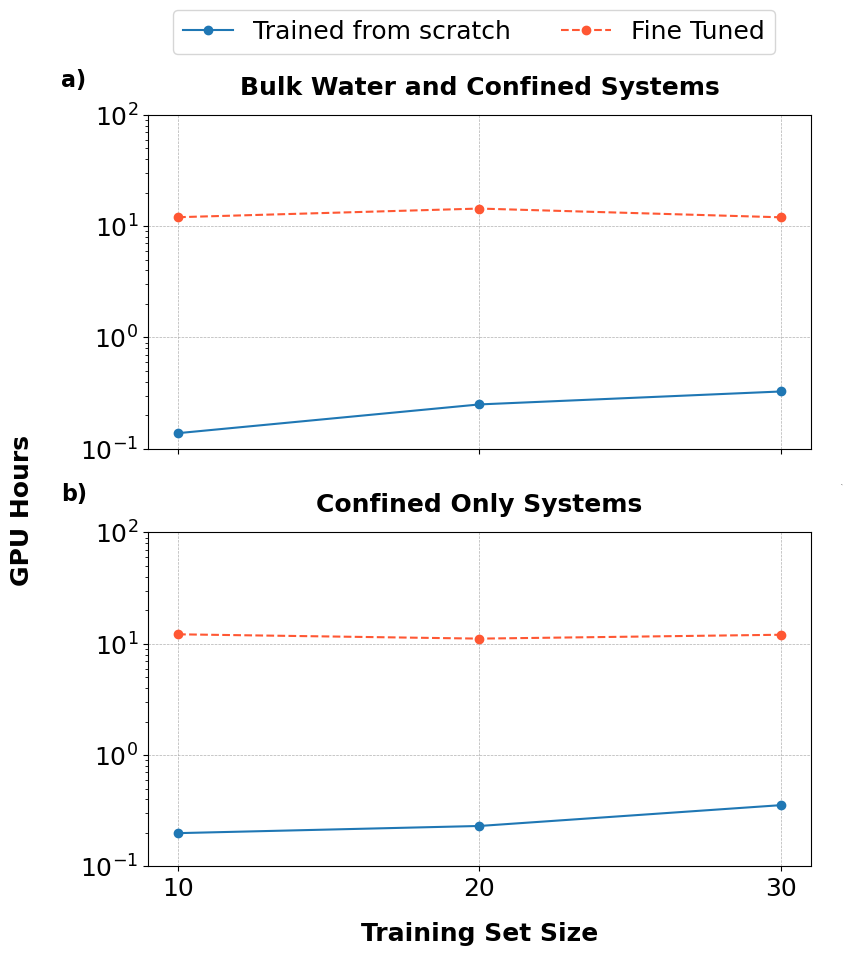

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(8,9))

# Set the ticks and ticklabels for all axes
plt.setp((ax1, ax2), xticks=[10, 20, 30])

ax1.set_title('Bulk Water and Confined Systems', pad=15)
ax1.plot(training_set_size, mace_scratch_computational_cost_mixed_training_set, marker="o")
ax1.plot(training_set_size, mace_fine_tuned_computational_cost_mixed_training_set, marker="o", linestyle="--")
ax1.set_yscale("log")
ax1.set_ylim(top = 100, bottom = 0.1)
ax1.grid(True, which='major', linestyle='--', linewidth=0.5)

ax2.set_title('Confined Only Systems', pad=15)
ax2.plot(training_set_size, mace_scratch_computational_cost_confined_only_training_set, marker="o")
ax2.plot(training_set_size, mace_fine_tuned_computational_cost_confined_only_training_set, marker="o", linestyle="--")
ax2.set_yscale("log")
ax2.set_ylim(top = 100, bottom = 0.1)
ax2.grid(True, which='major', linestyle='--', linewidth=0.5)

ax2.set_xlabel('Training Set Size', fontweight='bold', fontsize=18, labelpad=15)
fig.supylabel('GPU Hours', fontweight='bold', fontsize=18, x = -0.02)

fig.legend(labels=['Trained from scratch', 'Fine Tuned'], loc="upper center", bbox_to_anchor=(0.56, 1.07), ncol=2, fontsize=18)

fig.text(0.06, 0.99, 'a)', ha='center', va='top', fontsize=16, fontweight = "bold")
fig.text(0.06, 0.53, 'b)', ha='center', va='top', fontsize=16, fontweight = "bold")

fig.text(1.02, 0.53, 'b)', ha='center', va='top', fontsize=0)


for ax in fig.get_axes():
    ax.label_outer()

plt.tight_layout(h_pad=2)
plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/training_time_for_scratch_vs_fine_tuned_models.png', dpi=300, bbox_inches='tight')


- Continue training and fine-tuning for the 30 structures dataset.

Scratch: after 200 epochs and increasing the message passing dimensions ("128x0e + 128x1o + 128x2e") the errors decreased to 9.8 and 118.9 respectively.

         after 300 epochs and increasing the message passing dimensions ("128x0e + 128x1o + 128x2e") the errors decreased to 8.1 and 113.5 respectively.

         after 400 epochs and increasing the message passing dimensions ("128x0e + 128x1o + 128x2e") the errors decreased to 7.4 and 108.8 respectively.

         after 500 epochs and increasing the message passing dimensions ("128x0e + 128x1o + 128x2e") the errors decreased to 7.3 and 106.3 respectively.

         ...

         after 800 epochs and increasing the message passing dimensions ("128x0e + 128x1o + 128x2e") the errors decreased to 7.0 and 103.5 respectively.

         ...

         after 960 epochs (early stopping) and increasing the message passing dimensions ("128x0e + 128x1o + 128x2e") the errors were 7.2 and 102.9 respectively.

         Best model: `MACE_models/mace_30_training_scratch_run-3_stagetwo.model`
         

- Plot this further training to see where it converges to/meets the fine-tuned model

In [105]:
epochs = np.arange(50,1001, 50)

energy_error = [8.12, 4.66, 3.81, 3.66, 5.12, 2.92, 3.66, 3.71, 2.77, 4.42, 3.16, 2.50, 2.38, 3.35, 3.15, 2.53, 2.96, 2.57, 2.59, 2.63]

force_error = [99.44, 72.79, 68.43, 61.68, 59.71, 53.98, 55.68, 50.94, 49.70, 49.12, 49.47, 47.77, 46.56, 45.93, 45.78, 45.42, 45.17, 44.60, 44.19, 43.96]

In [106]:
# epochs = [100, 200, 300, 400, 500, 800, 960]

# energy_error = [9.5, 9.8, 8.1, 7.4, 7.3, 7.0, 7.2]

# force_error = [126.3, 118.9, 113.5, 108.8, 106.3, 103.5, 102.9]

In [110]:
plt.rcParams.update({
    'axes.titleweight': 'bold',        
    'axes.titlesize': 18,              
    'axes.labelsize': 18,              
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,             
    'legend.fontsize': 16,            
    'figure.titlesize': 18,            
})

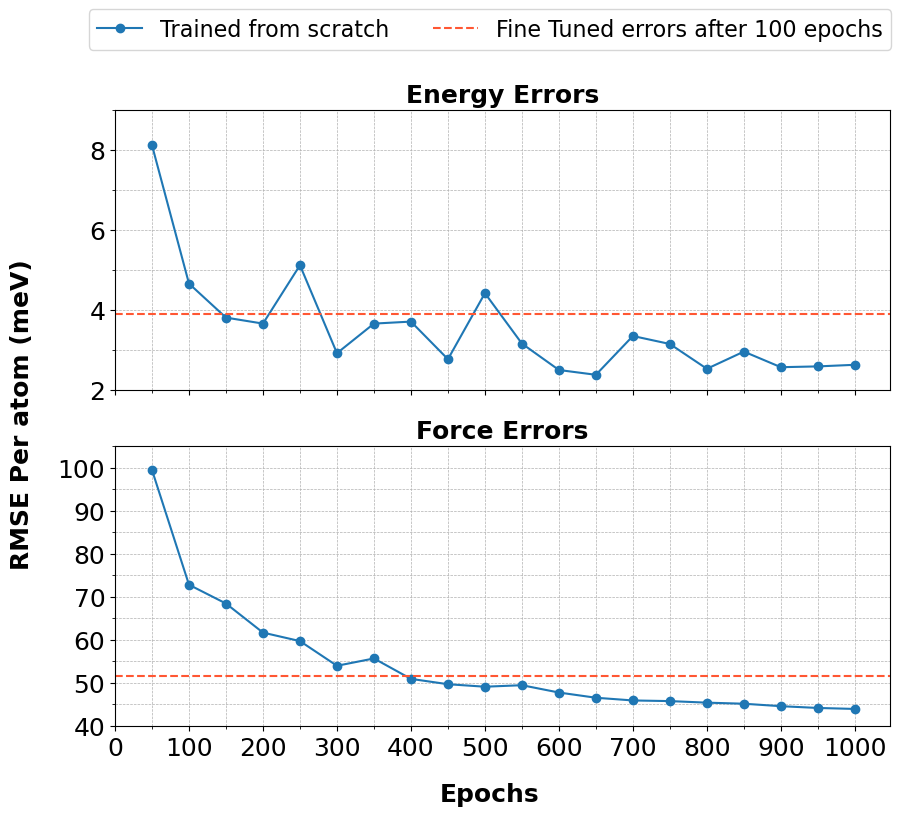

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize = (10,8))

# Set the ticks and ticklabels for all axes
plt.setp((ax1, ax2), xticks=[10, 20, 30])

ax1.set_title('Energy Errors')
ax1.plot(epochs, energy_error, marker="o")
ax1.set_yticks([2,4,6,8,10])
ax1.set_xticks(list(range(0, 1001, 100)))
ax1.set_ylim(top = 9)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.axhline(y=3.9, color = "#ff5733", linestyle='--')


ax2.set_title('Force Errors')
ax2.plot(epochs, force_error, marker="o")
ax2.set_xticks(list(range(0, 1001, 100)))
ax2.set_yticks([40,50,60,70,80,90,100])
ax2.set_ylim(top = 105)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.axhline(y=51.7, color = "#ff5733", linestyle='--')

fig.supxlabel('Epochs', fontweight='bold', fontsize = 18)
fig.supylabel('RMSE Per atom (meV)', fontweight='bold', fontsize = 18)
fig.legend(labels=['Trained from scratch', 'Fine Tuned errors after 100 epochs'], loc="upper center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=16)

# fig.text(0.06, 0.92, 'a)', ha='center', va='top', fontsize=14, fontweight='bold')
# fig.text(0.06, 0.51, 'b)', ha='center', va='top', fontsize=14, fontweight='bold')

for ax in fig.get_axes():
    ax.label_outer()
    
plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/greater_number_of_epochs_to_converge_scratch_training_to_fine_tuned.png', dpi=300, bbox_inches='tight')


## Learning Curves

- Best trained from scratch

- Best fine tuned

In [41]:
epochs_scratch = np.append(np.arange(0,126, 25), 1490)
# epochs_scratch = np.arange(0,1001, 25)

epochs_fine_tune = np.arange(0,101, 25)

losses_scratch = [1.00365734, 0.08673248, 0.06545763, 0.654676508, 0.05689386, 0.05623121,0.51778120]
energy_error_scratch = [634.28, 16.96, 10.29, 12.18, 9.05, 9.32, 6.80]
force_error_scratch = [409.05, 140.18, 123.22, 116.26, 115.11, 114.45, 107.53]

losses_fine_tuned = [0.02398319, 0.00161861, 0.00145039, 0.00138555, 0.0013598]
energy_error_fine_tuned = [97.02, 3.86, 3.91, 4.38, 4.81]
force_error_fine_tuned = [150.80, 59.53, 53.54, 51.54, 50.87]

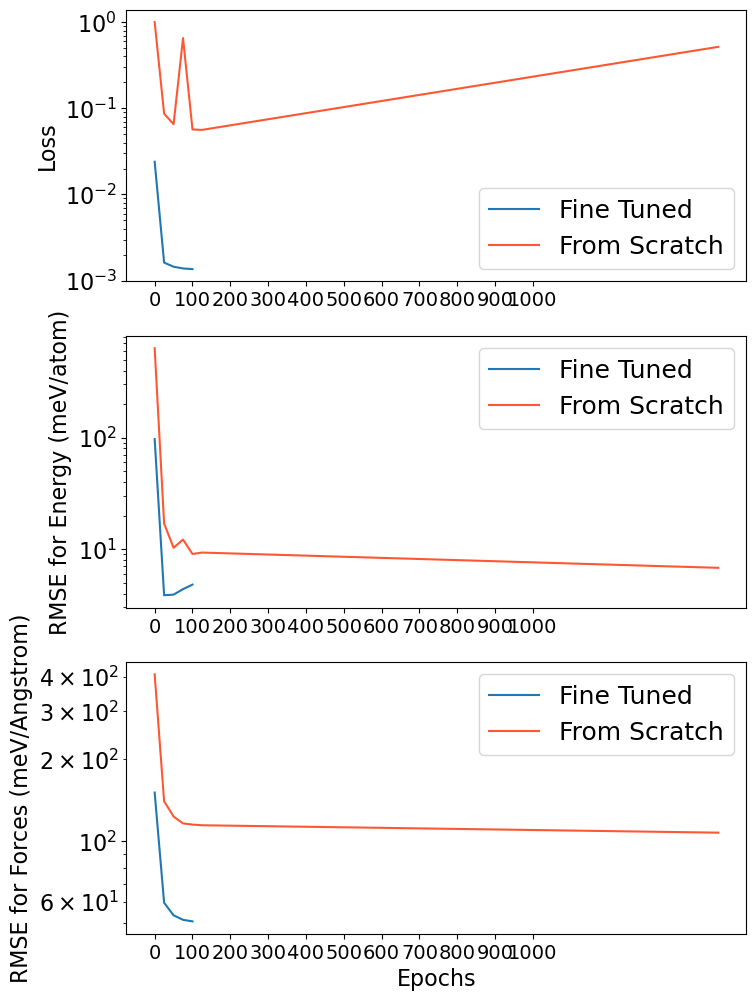

In [42]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(8,12))

# Set the ticks and ticklabels for all axes
plt.setp((ax1, ax2, ax3), xticks=np.arange(0,1001, 100))

ax1.set_ylabel('Loss')
ax1.plot(epochs_fine_tune, losses_fine_tuned)
ax1.plot(epochs_scratch, losses_scratch)
ax1.set_yscale('log')
ax1.legend(['Fine Tuned', 'From Scratch'])

ax2.set_ylabel('RMSE for Energy (meV/atom)')
ax2.plot(epochs_fine_tune, energy_error_fine_tuned)
ax2.plot(epochs_scratch, energy_error_scratch)
ax2.set_yscale('log')
ax2.legend(['Fine Tuned', 'From Scratch'])

ax3.set_ylabel('RMSE for Forces (meV/Angstrom)')
ax3.plot(epochs_fine_tune, force_error_fine_tuned)
ax3.plot(epochs_scratch, force_error_scratch)
ax3.set_yscale('log')
ax3.legend(['Fine Tuned', 'From Scratch'])

plt.xlabel('Epochs')

plt.show()

## What size dataset does the training from scratch reach the accuracy of any fine tuned models?

In [ ]:
# training_set_size = [10, 20, 30, 50, 100, 150, 200, 250]

# energy_errors = [10.1, 10.0, 7.2, 6.4, 5.8, 5.4, 5.1, 3.7]

# force_errors = [143.3, 111.9, 102.9, 78.7, 69.4, 69.2, 64.6, 74.9]

In [12]:
training_set_size = [10, 20, 30, 50, 100, 150, 200]

energy_errors = [95.96,22.34,12.35,3.66,2.95,2.83,2.71]

force_errors = [167.91,104.98,93.65,61.68,54.31,53.76,51.1]

For 200 training structures after 2000 epochs??? 6.7      |         98.2 

- Errors on Test set!!!

    - Trained till convergence

In [134]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize': 16,              
    'axes.labelsize': 18,              
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,             
    'legend.fontsize': 14,            
    'figure.titlesize': 16,            
})

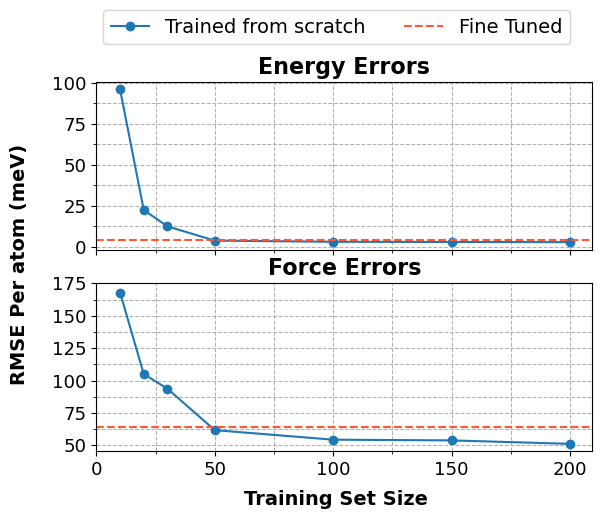

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(2, 1)

# Set the ticks and ticklabels for all axes
plt.setp((ax1, ax2), xticks=[10, 20, 30])

ax1.set_title('Energy Errors', fontweight='bold')
ax1.plot(training_set_size, energy_errors, marker="o")
ax1.axhline(y=3.9, color = "#ff5733", linestyle='--')
# ax1.axhline(y=6.2, color = "#ff5733", linestyle='--')
ax1.set_yticks([0,25,50,75,100])
ax1.set_xticks(list(range(0, 201, 50)))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(12.5))
ax1.grid(True, which='both', linestyle='--', linewidth=0.75)


ax2.set_title('Force Errors', fontweight='bold')
ax2.plot(training_set_size, force_errors, marker="o")
# ax2.axhline(y=73, color = "#ff5733", linestyle='--')
ax2.axhline(y=64, color = "#ff5733", linestyle='--')
ax2.set_xticks(list(range(0, 201, 50)))
ax2.set_yticks([50,75,100,125,150,175])
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(12.5))
ax2.grid(True, which='both', linestyle='--', linewidth=0.75)

fig.supxlabel('Training Set Size', fontweight='bold', fontsize = 14, y = -0.01)
fig.supylabel('RMSE Per atom (meV)', fontweight='bold', fontsize = 14, x = -0.01)
fig.legend(labels=['Trained from scratch', 'Fine Tuned'], loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=14)

plt.xlim(left = 0)

# fig.text(0.06, 0.92, 'a)', ha='center', va='top', fontsize=10)
# fig.text(0.06, 0.51, 'b)', ha='center', va='top', fontsize=10)

for ax in fig.get_axes():
    ax.label_outer()

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/greater_number_of_training_set_structures_to_converge_scratch_training_to_fine_tuned.png', dpi=300, bbox_inches='tight')


**Energy error may decrease due to higher weighting on force at the end of process?**

# Best Model...

`mace_50_training_run-3.model` - 105 epochs, big model...

Energy RMSE: 4.9, Force RMSE: 50.7 

, color = "#ff5733"

- Loss (default as scratch training doesn't look atv 'pt-head') vs epochs to look at convergence: related to data efficiency

/tmp/ipykernel_348256/2012261517.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


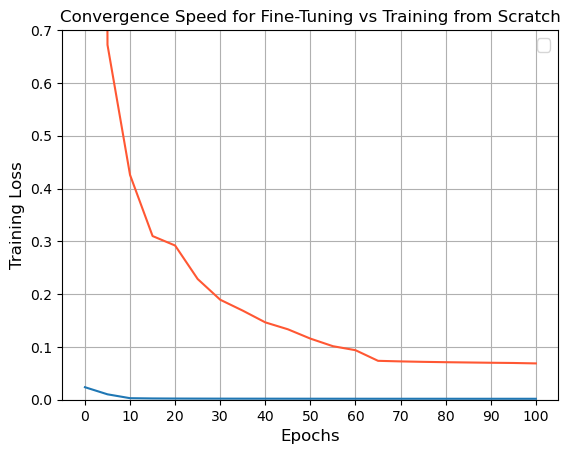

In [121]:
# Fine Tuned

epochs = list(range(0,105,5))

fine_tuned_loss = [0.02370950,0.01023956, 0.00291336, 0.00241930, 0.00222831, 0.00212363, 0.00206090, 0.00201240, 0.00197414, 0.00193891, 0.00190938, 0.00188486, 0.00186205, 0.00184366, 0.00183047, 0.00183109, 0.00181712, 0.00180049, 0.00179732, 0.00179291, 0.00178858]

train_from_scratch_loss = [12.40098190, 0.67210573, 0.42573670, 0.30998206, 0.29202646, 0.22860324, 0.18938185, 0.16872631, 0.14647530, 0.13341232, 0.11572125, 0.10135619, 0.09380946, 0.07367582, 0.07257704, 0.07172856, 0.07107970, 0.07054038, 0.070012910, 0.06959097, 0.06878450]

plt.plot(epochs, fine_tuned_loss)
plt.plot(epochs, train_from_scratch_loss)

plt.ylim(top = 0.7, bottom = 0)
plt.xticks(list(range(0,105,10)))
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Convergence Speed for Fine-Tuning vs Training from Scratch")
plt.legend()
plt.grid()

plt.show()

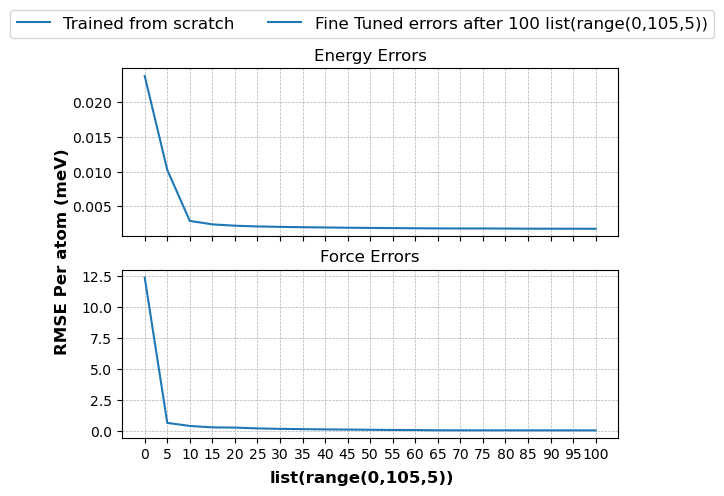

In [139]:
fig, ((ax1, ax2)) = plt.subplots(2, 1)

# Set the ticks and ticklabels for all axes
plt.setp((ax1, ax2), xticks=[10, 20, 30])

ax1.set_title('Energy Errors')
ax1.plot(list(range(0,105,5)), fine_tuned_loss)
#ax1.set_yticks([6,7,8,9,10])
ax1.set_xticks(list(range(0,105,5)))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)


ax2.set_title('Force Errors')
ax2.plot(list(range(0,105,5)), train_from_scratch_loss)
ax2.set_xticks(list(range(0,105,5)))
#ax2.set_yticks([60,80,100,120,140])
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

fig.supxlabel('list(range(0,105,5))', fontweight='bold')
fig.supylabel('RMSE Per atom (meV)', fontweight='bold')
fig.legend(labels=['Trained from scratch', 'Fine Tuned errors after 100 list(range(0,105,5))'], loc="upper center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=12)


for ax in fig.get_axes():
    ax.label_outer()
    

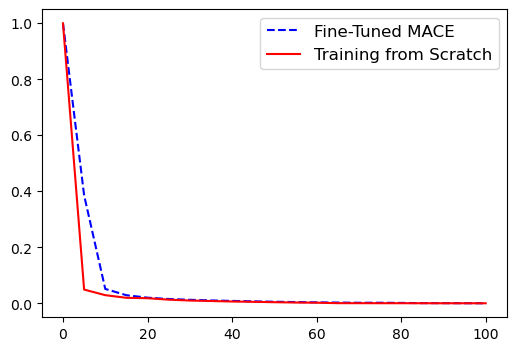

In [120]:
fine_tuned_loss_norm = (fine_tuned_loss - np.min(fine_tuned_loss)) / (np.max(fine_tuned_loss) - np.min(fine_tuned_loss))
train_from_scratch_loss_norm = (train_from_scratch_loss - np.min(train_from_scratch_loss)) / (np.max(train_from_scratch_loss) - np.min(train_from_scratch_loss))

plt.figure(figsize=(6, 4))
plt.plot(epochs, fine_tuned_loss_norm, label="Fine-Tuned MACE", linestyle="--", color="blue")
plt.plot(epochs, train_from_scratch_loss_norm, label="Training from Scratch", linestyle="-", color="red")
plt.legend()


- Energy and Force Correlation heatmaps

In [54]:
## Correlation plots
import seaborn as sns

from aseMolec import anaAtoms as aa
from aseMolec import extAtoms as ea

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
# Fine Tune Data

fine_tune_50_train_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/fine_tune_50_structures_train.xyz', ':')
fine_tune_50_test_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/fine_tune_50_structures_test.xyz', ':')

# Foundation Data

foundation_model_50_train_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/foundation_model_50_structures_train.xyz', ':')
foundation_model_50_test_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/foundation_model_50_structures_test.xyz', ':')

# Scratch data - 30 structures

scratch_more_epochs_train_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_30_structures_train.xyz', ':')
scratch_more_epochs_test_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_30_structures_test.xyz', ':')

# Scratch data - 200 structures

scratch_200_more_epochs_train_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_200_structures_train.xyz', ':')
scratch_200_more_epochs_test_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_200_structures_test.xyz', ':')

In [69]:
## Fine Tune

atomization_energy_reference_train_fine_tuned = ea.get_prop(fine_tune_50_train_data, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_reference_train_fine_tuned = ea.get_prop(fine_tune_50_train_data, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_reference_train_fine_tuned = np.concatenate(ea.get_prop(fine_tune_50_train_data, 'arrays', 'REF_forces')).flatten()

atomization_energy_reference_test_fine_tuned = ea.get_prop(fine_tune_50_test_data, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_reference_test_fine_tuned = ea.get_prop(fine_tune_50_test_data, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_reference_test_fine_tuned = np.concatenate(ea.get_prop(fine_tune_50_test_data, 'arrays', 'REF_forces')).flatten()

atomization_energy_mace_train_fine_tuned = ea.get_prop(fine_tune_50_train_data, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_mace_train_fine_tuned = ea.get_prop(fine_tune_50_train_data, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_mace_train_fine_tuned = np.concatenate(ea.get_prop(fine_tune_50_train_data, 'arrays', 'MACE_forces')).flatten()

atomization_energy_mace_test_fine_tuned = ea.get_prop(fine_tune_50_test_data, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_mace_test_fine_tuned = ea.get_prop(fine_tune_50_test_data, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_mace_test_fine_tuned = np.concatenate(ea.get_prop(fine_tune_50_test_data, 'arrays', 'MACE_forces')).flatten()


# Foundation

atomization_energy_reference_train_foundation_model = ea.get_prop(foundation_model_50_train_data, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_reference_train_foundation_model = ea.get_prop(foundation_model_50_train_data, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_reference_train_foundation_model = np.concatenate(ea.get_prop(foundation_model_50_train_data, 'arrays', 'REF_forces')).flatten()

atomization_energy_reference_test_foundation_model = ea.get_prop(foundation_model_50_test_data, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_reference_test_foundation_model = ea.get_prop(foundation_model_50_test_data, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_reference_test_foundation_model = np.concatenate(ea.get_prop(foundation_model_50_test_data, 'arrays', 'REF_forces')).flatten()

atomization_energy_mace_train_foundation_model = ea.get_prop(foundation_model_50_train_data, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_mace_train_foundation_model = ea.get_prop(foundation_model_50_train_data, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_mace_train_foundation_model = np.concatenate(ea.get_prop(foundation_model_50_train_data, 'arrays', 'MACE_forces')).flatten()

atomization_energy_mace_test_foundation_model = ea.get_prop(foundation_model_50_test_data, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_mace_test_foundation_model = ea.get_prop(foundation_model_50_test_data, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_mace_test_foundation_model = np.concatenate(ea.get_prop(foundation_model_50_test_data, 'arrays', 'MACE_forces')).flatten()

#Scratch - 30

atomization_energy_reference_train_scratch = ea.get_prop(scratch_more_epochs_train_data, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_reference_train_scratch = ea.get_prop(scratch_more_epochs_train_data, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_reference_train_scratch = np.concatenate(ea.get_prop(scratch_more_epochs_train_data, 'arrays', 'REF_forces')).flatten()

atomization_energy_reference_test_scratch = ea.get_prop(scratch_more_epochs_test_data, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_reference_test_scratch = ea.get_prop(scratch_more_epochs_test_data, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_reference_test_scratch = np.concatenate(ea.get_prop(scratch_more_epochs_test_data, 'arrays', 'REF_forces')).flatten()

atomization_energy_mace_train_scratch = ea.get_prop(scratch_more_epochs_train_data, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_mace_train_scratch = ea.get_prop(scratch_more_epochs_train_data, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_mace_train_scratch = np.concatenate(ea.get_prop(scratch_more_epochs_train_data, 'arrays', 'MACE_forces')).flatten()

atomization_energy_mace_test_scratch = ea.get_prop(scratch_more_epochs_test_data, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_mace_test_scratch = ea.get_prop(scratch_more_epochs_test_data, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_mace_test_scratch = np.concatenate(ea.get_prop(scratch_more_epochs_test_data, 'arrays', 'MACE_forces')).flatten()

#Scratch - 200

atomization_energy_reference_train_scratch_200 = ea.get_prop(scratch_200_more_epochs_train_data, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_reference_train_scratch_200 = ea.get_prop(scratch_200_more_epochs_train_data, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_reference_train_scratch_200 = np.concatenate(ea.get_prop(scratch_200_more_epochs_train_data, 'arrays', 'REF_forces')).flatten()

atomization_energy_reference_test_scratch_200 = ea.get_prop(scratch_200_more_epochs_test_data, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_reference_test_scratch_200 = ea.get_prop(scratch_200_more_epochs_test_data, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_reference_test_scratch_200 = np.concatenate(ea.get_prop(scratch_200_more_epochs_test_data, 'arrays', 'REF_forces')).flatten()

atomization_energy_mace_train_scratch_200 = ea.get_prop(scratch_200_more_epochs_train_data, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_mace_train_scratch_200 = ea.get_prop(scratch_200_more_epochs_train_data, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_mace_train_scratch_200 = np.concatenate(ea.get_prop(scratch_200_more_epochs_train_data, 'arrays', 'MACE_forces')).flatten()

atomization_energy_mace_test_scratch_200 = ea.get_prop(scratch_200_more_epochs_test_data, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
total_energy_mace_test_scratch_200 = ea.get_prop(scratch_200_more_epochs_test_data, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten()
forces_mace_test_scratch_200 = np.concatenate(ea.get_prop(scratch_200_more_epochs_test_data, 'arrays', 'MACE_forces')).flatten()

In [72]:
len(atomization_energy_mace_train_scratch)

30

In [74]:
# Fine Tuned

## Train

df_atomization_energy_train_fine_tuned = pd.DataFrame({'reference_atomization_energy_fine_tuned_train' : atomization_energy_reference_train_fine_tuned, 'mace_atomization_energy_fine_tuned_train' : atomization_energy_mace_train_fine_tuned})
df_total_energy_train_fine_tuned = pd.DataFrame({'reference_total_energy_fine_tuned_train' : total_energy_reference_train_fine_tuned, 'mace_total_energy_fine_tuned_train' : total_energy_mace_train_fine_tuned})
df_forces_train_fine_tuned = pd.DataFrame({'reference_forces_fine_tuned_train' : forces_reference_train_fine_tuned, 'mace_forces_fine_tuned_train' : forces_mace_train_fine_tuned})

## Test

df_atomization_energy_test_fine_tuned = pd.DataFrame({'mace_atomization_energy_fine_tuned_test' : atomization_energy_mace_test_fine_tuned, 'reference_atomization_energy_fine_tuned_test' : atomization_energy_reference_test_fine_tuned})
df_total_energy_test_fine_tuned = pd.DataFrame({'mace_total_energy_fine_tuned_test' : total_energy_mace_test_fine_tuned, 'reference_total_energy_fine_tuned_test' : total_energy_reference_test_fine_tuned})
df_forces_test_fine_tuned = pd.DataFrame({'reference_forces_fine_tuned_test' : forces_reference_test_fine_tuned, 'mace_forces_fine_tuned_test' : forces_mace_test_fine_tuned})

# Foundation

## Train

df_atomization_energy_train_foundation_model = pd.DataFrame({'reference_atomization_energy_foundation_model_train' : atomization_energy_reference_train_foundation_model, 'mace_atomization_energy_foundation_model_train' : atomization_energy_mace_train_foundation_model})
df_total_energy_train_foundation_model = pd.DataFrame({'reference_total_energy_foundation_model_train' : total_energy_reference_train_foundation_model, 'mace_total_energy_foundation_model_train' : total_energy_mace_train_foundation_model})
df_forces_train_foundation_model = pd.DataFrame({'reference_forces_foundation_model_train' : forces_reference_train_foundation_model, 'mace_forces_foundation_model_train' : forces_mace_train_foundation_model})

## Test

df_atomization_energy_test_foundation_model = pd.DataFrame({'mace_atomization_energy_foundation_model_test' : atomization_energy_mace_test_foundation_model, 'reference_atomization_energy_foundation_model_test' : atomization_energy_reference_test_foundation_model})
df_total_energy_test_foundation_model = pd.DataFrame({'mace_total_energy_foundation_model_test' : total_energy_mace_test_foundation_model, 'reference_total_energy_foundation_model_test' : total_energy_reference_test_foundation_model})
df_forces_test_foundation_model = pd.DataFrame({'reference_forces_foundation_model_test' : forces_reference_test_foundation_model, 'mace_forces_foundation_model_test' : forces_mace_test_foundation_model})


# Scratch - 30

## Train

df_atomization_energy_train_scratch = pd.DataFrame({'reference_atomization_energy_scratch_train' : atomization_energy_reference_train_scratch, 'mace_atomization_energy_scratch_train' : atomization_energy_mace_train_scratch})
df_total_energy_train_scratch = pd.DataFrame({'reference_total_energy_scratch_train' : total_energy_reference_train_scratch, 'mace_total_energy_scratch_train' : total_energy_mace_train_scratch})
df_forces_train_scratch = pd.DataFrame({'reference_forces_scratch_train' : forces_reference_train_scratch, 'mace_forces_scratch_train' : forces_mace_train_scratch})

## Test

df_atomization_energy_test_scratch = pd.DataFrame({'mace_atomization_energy_scratch_test' : atomization_energy_mace_test_scratch, 'reference_atomization_energy_scratch_test' : atomization_energy_reference_test_scratch})
df_total_energy_test_scratch = pd.DataFrame({'mace_total_energy_scratch_test' : total_energy_mace_test_scratch, 'reference_total_energy_scratch_test' : total_energy_reference_test_scratch})
df_forces_test_scratch = pd.DataFrame({'reference_forces_scratch_test' : forces_reference_test_scratch, 'mace_forces_scratch_test' : forces_mace_test_scratch})


# Scratch - 200

## Train

df_atomization_energy_train_scratch_200 = pd.DataFrame({'reference_atomization_energy_scratch_train' : atomization_energy_reference_train_scratch_200, 'mace_atomization_energy_scratch_train' : atomization_energy_mace_train_scratch_200})
df_total_energy_train_scratch_200 = pd.DataFrame({'reference_total_energy_scratch_train' : total_energy_reference_train_scratch_200, 'mace_total_energy_scratch_train' : total_energy_mace_train_scratch_200})
df_forces_train_scratch_200 = pd.DataFrame({'reference_forces_scratch_train' : forces_reference_train_scratch_200, 'mace_forces_scratch_train' : forces_mace_train_scratch_200})

## Test

df_atomization_energy_test_scratch_200 = pd.DataFrame({'mace_atomization_energy_scratch_test' : atomization_energy_mace_test_scratch_200, 'reference_atomization_energy_scratch_test' : atomization_energy_reference_test_scratch_200})
df_total_energy_test_scratch_200 = pd.DataFrame({'mace_total_energy_scratch_test' : total_energy_mace_test_scratch_200, 'reference_total_energy_scratch_test' : total_energy_reference_test_scratch_200})
df_forces_test_scratch_200 = pd.DataFrame({'reference_forces_scratch_test' : forces_reference_test_scratch_200, 'mace_forces_scratch_test' : forces_mace_test_scratch_200})

In [75]:
# Correlations


## Fine Tuned
corr_atomization_energy_fine_tuned_vs_reference_train = df_atomization_energy_train_fine_tuned.corr(method = 'pearson')

corr_total_energy_fine_tuned_vs_reference_train = df_total_energy_train_fine_tuned.corr(method = 'pearson')

corr_forces_fine_tuned_vs_reference_train = df_forces_train_fine_tuned.corr(method = 'pearson')



corr_atomization_energy_fine_tuned_vs_reference_test = df_atomization_energy_test_fine_tuned.corr(method = 'pearson')

corr_total_energy_fine_tuned_vs_reference_test = df_total_energy_test_fine_tuned.corr(method = 'pearson')

corr_forces_fine_tuned_vs_reference_test = df_forces_test_fine_tuned.corr(method = 'pearson')


## Foundation

corr_atomization_energy_foundation_model_vs_reference_train = df_atomization_energy_train_foundation_model.corr(method = 'pearson')

corr_total_energy_foundation_model_vs_reference_train = df_total_energy_train_foundation_model.corr(method = 'pearson')

corr_forces_foundation_model_vs_reference_train = df_forces_train_foundation_model.corr(method = 'pearson')



corr_atomization_energy_foundation_model_vs_reference_test = df_atomization_energy_test_foundation_model.corr(method = 'pearson')

corr_total_energy_foundation_model_vs_reference_test = df_total_energy_test_foundation_model.corr(method = 'pearson')

corr_forces_foundation_model_vs_reference_test = df_forces_test_foundation_model.corr(method = 'pearson')


## Scratch - 30

corr_atomization_energy_scratch_vs_reference_train = df_atomization_energy_train_scratch.corr(method = 'pearson')

corr_total_energy_scratch_vs_reference_train = df_total_energy_train_scratch.corr(method = 'pearson')

corr_forces_scratch_vs_reference_train = df_forces_train_scratch.corr(method = 'pearson')



corr_atomization_energy_scratch_vs_reference_test = df_atomization_energy_test_scratch.corr(method = 'pearson')

corr_total_energy_scratch_vs_reference_test = df_total_energy_test_scratch.corr(method = 'pearson')

corr_forces_scratch_vs_reference_test = df_forces_test_scratch.corr(method = 'pearson')


## Scratch - 200

corr_atomization_energy_scratch_200_vs_reference_train = df_atomization_energy_train_scratch_200.corr(method = 'pearson')

corr_total_energy_scratch_200_vs_reference_train = df_total_energy_train_scratch_200.corr(method = 'pearson')

corr_forces_scratch_200_vs_reference_train = df_forces_train_scratch_200.corr(method = 'pearson')



corr_atomization_energy_scratch_200_vs_reference_test = df_atomization_energy_test_scratch_200.corr(method = 'pearson')

corr_total_energy_scratch_200_vs_reference_test = df_total_energy_test_scratch_200.corr(method = 'pearson')

corr_forces_scratch_200_vs_reference_test = df_forces_test_scratch_200.corr(method = 'pearson')

In [76]:
# Fine tuned

corr_atomization_energy_fine_tuned_vs_reference_train_flat = corr_atomization_energy_fine_tuned_vs_reference_train.values[np.triu_indices_from(corr_atomization_energy_fine_tuned_vs_reference_train, k=1)]
corr_total_energy_fine_tuned_vs_reference_train_flat = corr_total_energy_fine_tuned_vs_reference_train.values[np.triu_indices_from(corr_total_energy_fine_tuned_vs_reference_train, k=1)]
corr_forces_fine_tuned_vs_reference_train_flat = corr_forces_fine_tuned_vs_reference_train.values[np.triu_indices_from(corr_forces_fine_tuned_vs_reference_train, k=1)]

corr_atomization_energy_fine_tuned_vs_reference_test_flat = corr_atomization_energy_fine_tuned_vs_reference_test.values[np.triu_indices_from(corr_atomization_energy_fine_tuned_vs_reference_test, k=1)]
corr_total_energy_fine_tuned_vs_reference_test_flat = corr_total_energy_fine_tuned_vs_reference_test.values[np.triu_indices_from(corr_total_energy_fine_tuned_vs_reference_test, k=1)]
corr_forces_fine_tuned_vs_reference_test_flat = corr_forces_fine_tuned_vs_reference_test.values[np.triu_indices_from(corr_forces_fine_tuned_vs_reference_test, k=1)]

# Foundation

corr_atomization_energy_foundation_model_vs_reference_train_flat = corr_atomization_energy_foundation_model_vs_reference_train.values[np.triu_indices_from(corr_atomization_energy_foundation_model_vs_reference_train, k=1)]
corr_total_energy_foundation_model_vs_reference_train_flat = corr_total_energy_foundation_model_vs_reference_train.values[np.triu_indices_from(corr_total_energy_foundation_model_vs_reference_train, k=1)]
corr_forces_foundation_model_vs_reference_train_flat = corr_forces_foundation_model_vs_reference_train.values[np.triu_indices_from(corr_forces_foundation_model_vs_reference_train, k=1)]

corr_atomization_energy_foundation_model_vs_reference_test_flat = corr_atomization_energy_foundation_model_vs_reference_test.values[np.triu_indices_from(corr_atomization_energy_foundation_model_vs_reference_test, k=1)]
corr_total_energy_foundation_model_vs_reference_test_flat = corr_total_energy_foundation_model_vs_reference_test.values[np.triu_indices_from(corr_total_energy_foundation_model_vs_reference_test, k=1)]
corr_forces_foundation_model_vs_reference_test_flat = corr_forces_foundation_model_vs_reference_test.values[np.triu_indices_from(corr_forces_foundation_model_vs_reference_test, k=1)]

# Scratch - 30

corr_atomization_energy_scratch_vs_reference_train_flat = corr_atomization_energy_scratch_vs_reference_train.values[np.triu_indices_from(corr_atomization_energy_scratch_vs_reference_train, k=1)]
corr_total_energy_scratch_vs_reference_train_flat = corr_total_energy_scratch_vs_reference_train.values[np.triu_indices_from(corr_total_energy_scratch_vs_reference_train, k=1)]
corr_forces_scratch_vs_reference_train_flat = corr_forces_scratch_vs_reference_train.values[np.triu_indices_from(corr_forces_scratch_vs_reference_train, k=1)]

corr_atomization_energy_scratch_vs_reference_test_flat = corr_atomization_energy_scratch_vs_reference_test.values[np.triu_indices_from(corr_atomization_energy_scratch_vs_reference_test, k=1)]
corr_total_energy_scratch_vs_reference_test_flat = corr_total_energy_scratch_vs_reference_test.values[np.triu_indices_from(corr_total_energy_scratch_vs_reference_test, k=1)]
corr_forces_scratch_vs_reference_test_flat = corr_forces_scratch_vs_reference_test.values[np.triu_indices_from(corr_forces_scratch_vs_reference_test, k=1)]

# Scratch - 200

corr_atomization_energy_scratch_200_vs_reference_train_flat = corr_atomization_energy_scratch_200_vs_reference_train.values[np.triu_indices_from(corr_atomization_energy_scratch_200_vs_reference_train, k=1)]
corr_total_energy_scratch_200_vs_reference_train_flat = corr_total_energy_scratch_200_vs_reference_train.values[np.triu_indices_from(corr_total_energy_scratch_200_vs_reference_train, k=1)]
corr_forces_scratch_200_vs_reference_train_flat = corr_forces_scratch_200_vs_reference_train.values[np.triu_indices_from(corr_forces_scratch_200_vs_reference_train, k=1)]

corr_atomization_energy_scratch_200_vs_reference_test_flat = corr_atomization_energy_scratch_200_vs_reference_test.values[np.triu_indices_from(corr_atomization_energy_scratch_200_vs_reference_test, k=1)]
corr_total_energy_scratch_200_vs_reference_test_flat = corr_total_energy_scratch_200_vs_reference_test.values[np.triu_indices_from(corr_total_energy_scratch_200_vs_reference_test, k=1)]
corr_forces_scratch_200_vs_reference_test_flat = corr_forces_scratch_200_vs_reference_test.values[np.triu_indices_from(corr_forces_scratch_200_vs_reference_test, k=1)]

In [77]:
training_correlations_df = pd.DataFrame({'Atomization \n Energy':[np.abs(corr_atomization_energy_fine_tuned_vs_reference_train_flat[0]), np.abs(corr_atomization_energy_foundation_model_vs_reference_train_flat[0]), np.abs(corr_atomization_energy_scratch_vs_reference_train_flat[0]), np.abs(corr_atomization_energy_scratch_200_vs_reference_train_flat[0])], 'Total \n Energy':[np.abs(corr_total_energy_fine_tuned_vs_reference_train_flat[0]), np.abs(corr_total_energy_foundation_model_vs_reference_train_flat[0]), np.abs(corr_total_energy_scratch_vs_reference_train_flat[0]), np.abs(corr_total_energy_scratch_200_vs_reference_train_flat[0])], 'Total \n Forces':[np.abs(corr_forces_fine_tuned_vs_reference_train_flat[0]), np.abs(corr_forces_foundation_model_vs_reference_train_flat[0]), np.abs(corr_forces_scratch_vs_reference_train_flat[0]), np.abs(corr_forces_scratch_200_vs_reference_train_flat[0])]}, index = ['Fine \n Tuned', 'Foundation \n Model', 'Trained \n From Scratch \n 30 Structures', 'Trained \n From Scratch \n 200 Structures'])

testing_correlations_df = pd.DataFrame({'Atomization \n Energy':[np.abs(corr_atomization_energy_fine_tuned_vs_reference_test_flat[0]), np.abs(corr_atomization_energy_foundation_model_vs_reference_test_flat[0]), np.abs(corr_atomization_energy_scratch_vs_reference_test_flat[0]), np.abs(corr_atomization_energy_scratch_200_vs_reference_test_flat[0])], 'Total \n Energy':[np.abs(corr_total_energy_fine_tuned_vs_reference_test_flat[0]), np.abs(corr_total_energy_foundation_model_vs_reference_test_flat[0]), np.abs(corr_total_energy_scratch_vs_reference_test_flat[0]), np.abs(corr_total_energy_scratch_200_vs_reference_test_flat[0])], 'Total \n Forces':[np.abs(corr_forces_fine_tuned_vs_reference_test_flat[0]), np.abs(corr_forces_foundation_model_vs_reference_test_flat[0]), np.abs(corr_forces_scratch_vs_reference_test_flat[0]), np.abs(corr_forces_scratch_200_vs_reference_test_flat[0])]}, index = ['Fine \n Tuned', 'Foundation \n Model', 'Trained \n From Scratch \n 30 Structures', 'Trained \n From Scratch \n 200 Structures'])

In [90]:
plt.rcParams.update({
    'axes.titleweight': 'bold',        
    'axes.titlesize': 18,              
    'axes.labelsize': 14,              
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,             
    'legend.fontsize': 18,            
    'figure.titlesize': 18,            
})

- Train set

<Figure size 1200x1000 with 0 Axes>

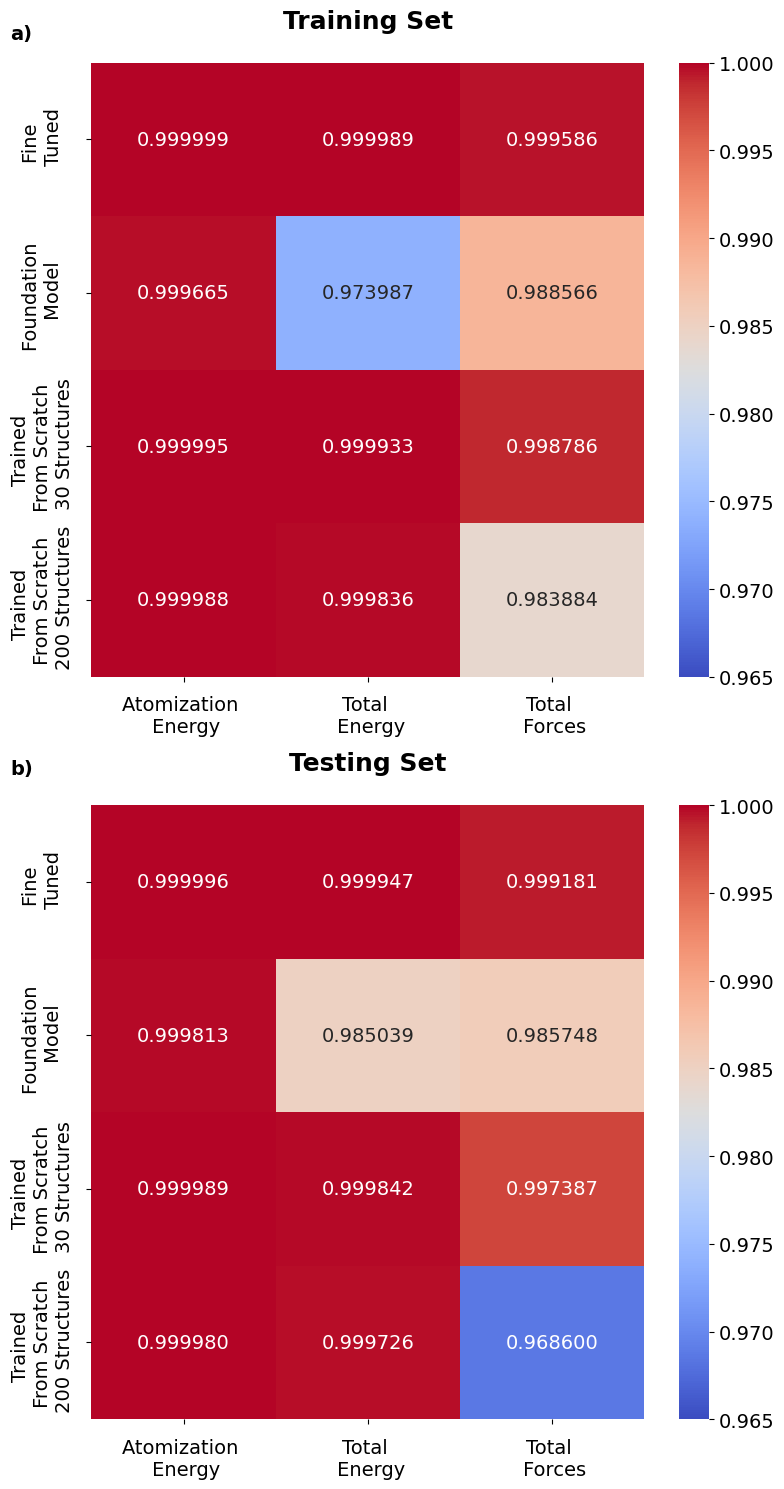

In [ ]:
plt.figure(figsize=(12, 10))

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(8, 15))

sns.heatmap(training_correlations_df, annot=True, cmap='coolwarm', vmin = 0.965, vmax = 1, fmt=".6f", ax = ax1, annot_kws={"size": 14})
ax1.set_xticklabels(ax1.get_xticklabels(), ha='center', rotation = 0)
ax1.set_yticklabels(ax1.get_yticklabels(), ha='center', rotation = 90, x = -0.03)

ax1.tick_params(axis='x', pad=10)
ax1.tick_params(axis='y', pad=20)

ax1.set_title("Training Set", pad = 25)


sns.heatmap(testing_correlations_df, annot=True, cmap='coolwarm', vmin = 0.965, vmax = 1, fmt=".6f", ax = ax2, annot_kws={"size": 14})
ax2.set_xticklabels(ax2.get_xticklabels(), ha='center', rotation = 0)
ax2.set_yticklabels(ax1.get_yticklabels(), ha='center', rotation = 90, x = -0.03)

ax2.tick_params(axis='x', pad=10)
ax2.tick_params(axis='y', pad=20)

ax2.set_title("Testing Set", pad = 25)

fig.text(0.03, 0.98, 'a)', ha='center', va='top', fontsize=14, fontweight = "bold")
fig.text(0.03, 0.49, 'b)', ha='center', va='top', fontsize=14, fontweight = "bold")


plt.tight_layout()

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/correlation_plots_heat_maps.png', dpi=300, bbox_inches='tight')

plt.show()

## Look at errors for energies and forces compared to more accurate methods

In [26]:
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Define a formatter function to round values to one decimal place
formatter = FuncFormatter(lambda x, _: f'{x:.1f}')

In [4]:
def plot_RMSEs_combined(db_train, db_test, labs):
    
    
    ea.rename_prop_tag(db_train, 'MACE_energy', 'MACE_energy') 
    ea.rename_prop_tag(db_train, 'MACE_forces', 'MACE_forces') 
    
    ea.rename_prop_tag(db_test, 'MACE_energy', 'MACE_energy') 
    ea.rename_prop_tag(db_test, 'MACE_forces', 'MACE_forces') 

    fig = plt.figure(figsize=(9,12), dpi=100)
    
    # These can be changed to adjust each plot...
    
    #For best fine-tuned
    
    # row_1_plots_ticks = [-3,-4,-5,-6,-7,-8]
    # row_2_plots_ticks = [-155.2,-155.6,-156.0,-156.4]
    # row_3_plots_ticks = [-15,-10,-5,0,5,10,15]
    
    # For best trained from scratch
    row_1_plots_ticks = [-3,-4,-5,-6,-7,-8]
    row_2_plots_ticks = [-155.2,-155.6,-156.0,-156.4]
    row_3_plots_ticks = [-20,-10,0,10,20]
    
    ax1 = plt.subplot(3,2,1)
    pp.plot_prop(ea.get_prop(db_train, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten(), \
                 ea.get_prop(db_train, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten(), \
                 title=r'Energy $(\rm eV/atom)$ ', labs=labs, rel=False)
    ax1.set_xticks(row_1_plots_ticks)
    ax1.set_yticks(row_1_plots_ticks)
    
    ax2 = plt.subplot(3,2,2)
    pp.plot_prop(ea.get_prop(db_test, 'bind', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten(), \
                    ea.get_prop(db_test, 'bind', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten(), \
                    title=r'Energy $(\rm eV/atom)$ ', labs=labs, rel=False)
    ax2.set_xticks(row_1_plots_ticks)
    ax2.set_yticks(row_1_plots_ticks)

    ax3 = plt.subplot(3,2,3)
    pp.plot_prop(ea.get_prop(db_train, 'info', 'REF_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten(), \
                 ea.get_prop(db_train, 'info', 'MACE_energy', True, E0 = {'H':-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten(), \
                 title=r'Energy $(\rm eV/atom)$ ', labs=labs, rel=False)
    ax3.set_xticks(row_2_plots_ticks)
    ax3.set_yticks(row_2_plots_ticks)
    
    ax4 = plt.subplot(3,2,4)
    pp.plot_prop(ea.get_prop(db_test, 'info', 'REF_energy', True, E0 = {1:-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten(), \
                    ea.get_prop(db_test, 'info', 'MACE_energy', True, E0 = {1:-13.656315639066156, 'C':-146.65071522867848, 'O':-432.2257363227328}).flatten(), \
                    title=r'Energy $(\rm eV/atom)$ ', labs=labs, rel=False)
    ax4.set_xticks(row_2_plots_ticks)
    ax4.set_yticks(row_2_plots_ticks)
    
    ax5 = plt.subplot(3,2,5)
    pp.plot_prop(np.concatenate(ea.get_prop(db_train, 'arrays', 'REF_forces')).flatten(), \
                 np.concatenate(ea.get_prop(db_train, 'arrays', 'MACE_forces')).flatten(), \
                 title=r'Forces $\rm (eV/\AA)$ ', labs=labs, rel=False)
    ax5.set_xticks(row_3_plots_ticks)
    ax5.set_yticks(row_3_plots_ticks)
    
    ax6 = plt.subplot(3,2,6)
    pp.plot_prop(np.concatenate(ea.get_prop(db_test, 'arrays', 'REF_forces')).flatten(), \
                    np.concatenate(ea.get_prop(db_test, 'arrays', 'MACE_forces')).flatten(), \
                    title=r'Forces $\rm (eV/\AA)$ ', labs=labs, rel=False)
    ax6.set_xticks(row_3_plots_ticks)
    ax6.set_yticks(row_3_plots_ticks)
    
    fig.text(0.04, 0.98, 'a)', ha='center', va='top', fontsize=10, fontweight="bold")
    fig.text(0.04, 0.66, 'b)', ha='center', va='top', fontsize=10, fontweight="bold")
    fig.text(0.04, 0.32, 'c)', ha='center', va='top', fontsize=10, fontweight="bold")

    # fig.text(0.25, 0.99, "Training Data", fontsize=16, fontweight="bold", ha="center", labelpad = 15)
    # fig.text(0.75, 0.99, "Testing Data", fontsize=16, fontweight="bold", ha="center")

    plt.tight_layout()
    
    return

### These figures show correlation plots between XTB values and MACE predicted values for atomization energy per atom, the total energy per atom and forces.

- Best fine tuned

In [ ]:
fine_tune_50_train_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/fine_tune_50_structures_train.xyz', ':')
fine_tune_50_test_data = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/fine_tune_50_structures_test.xyz', ':')

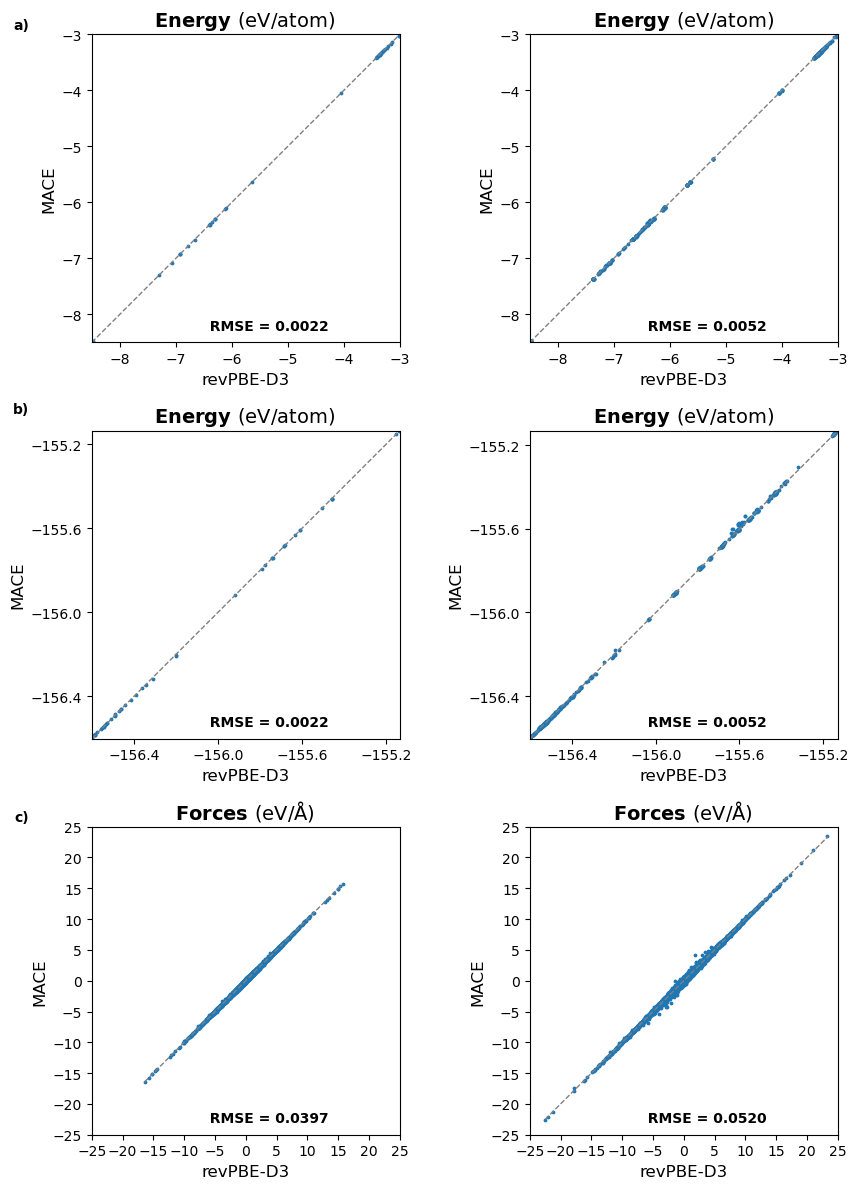

In [ ]:
plot_RMSEs_combined(fine_tune_50_train_data, fine_tune_50_test_data, labs=['revPBE-D3', 'MACE'])

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/best_fine_tuned_energy_and_forces_compared_to_reference.png', dpi=300, bbox_inches='tight')

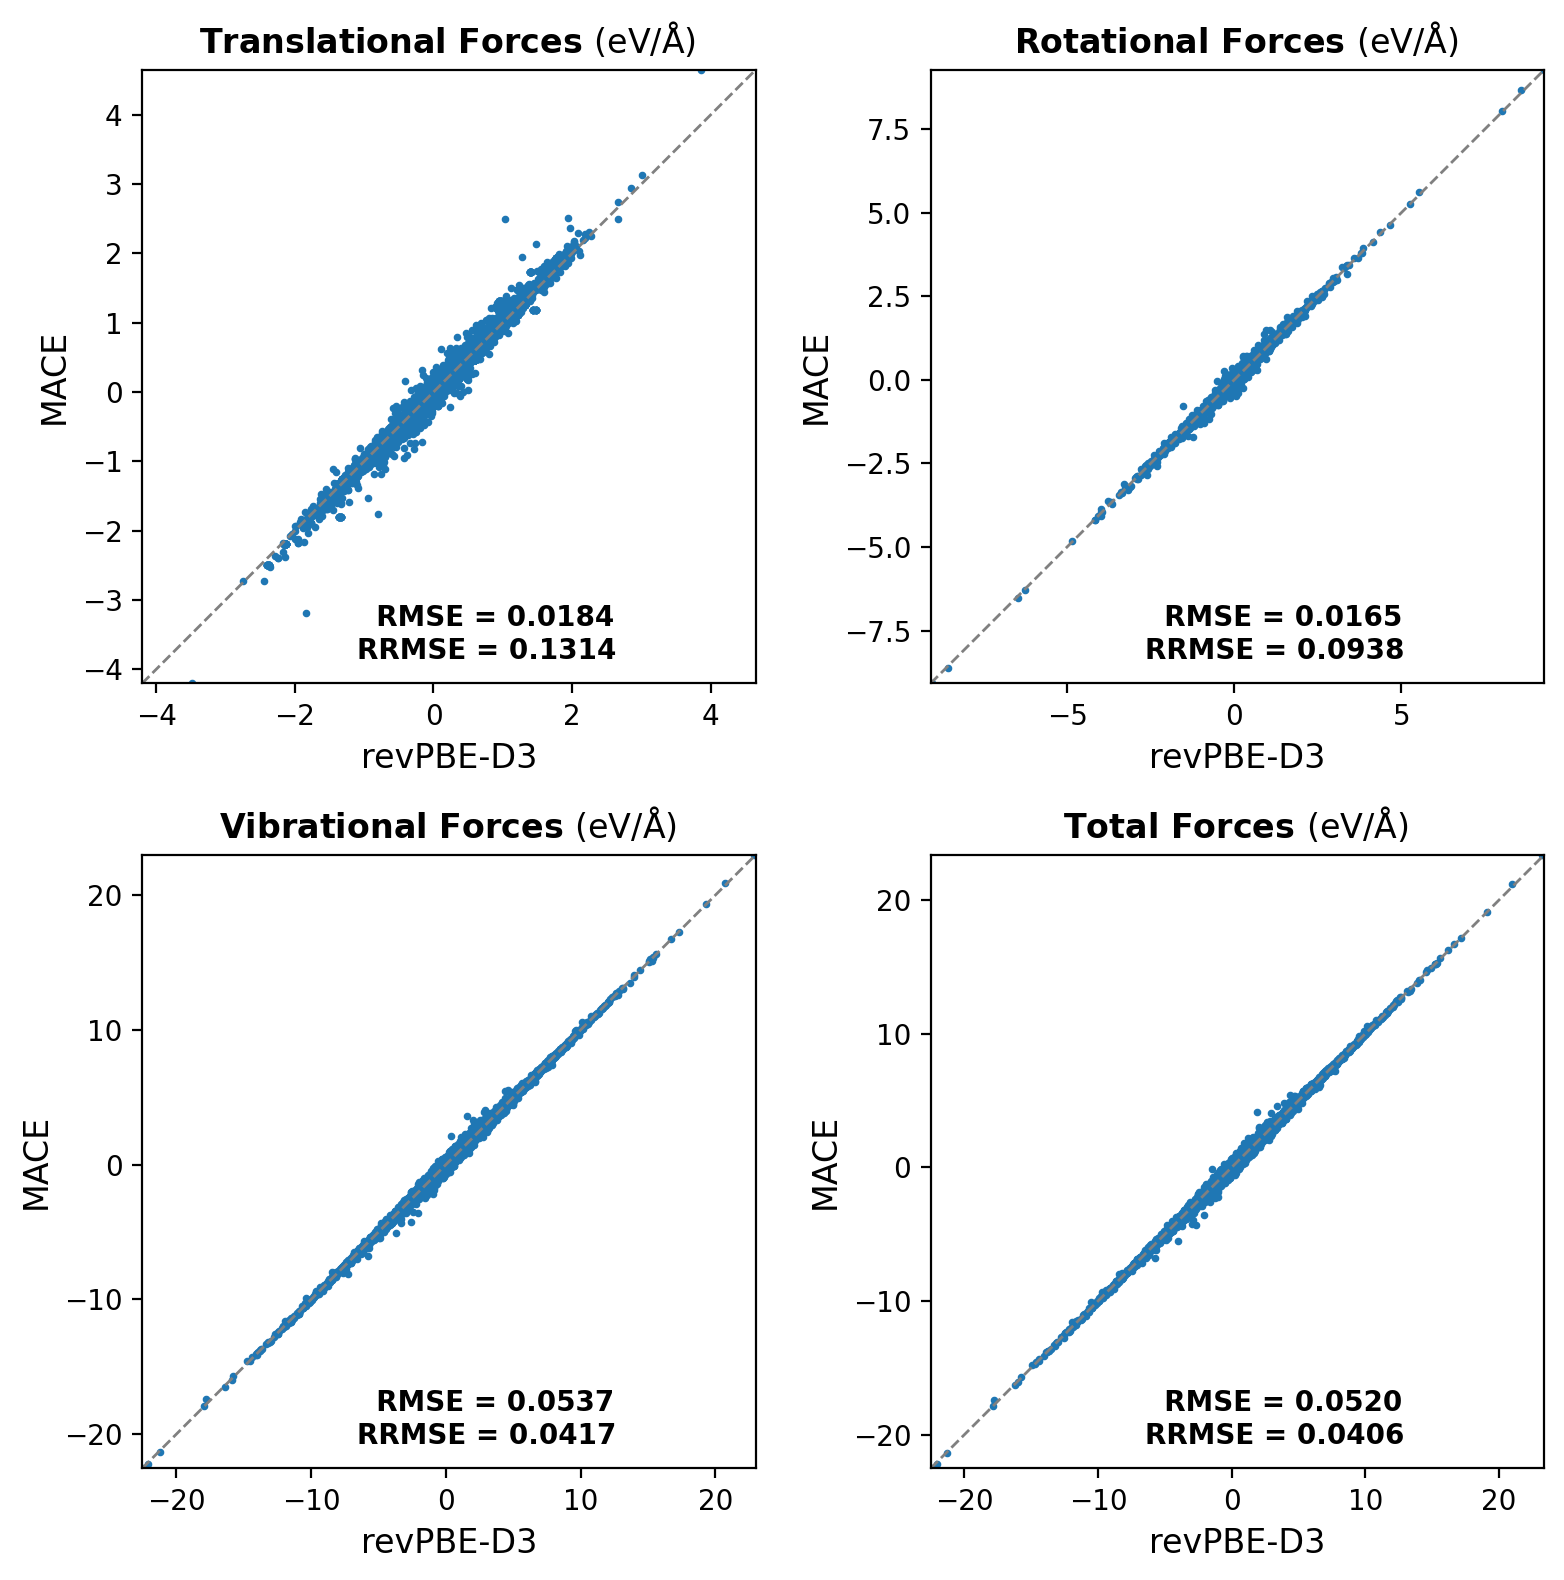

In [ ]:

db1 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/fine_tune_50_structures_test.xyz', ':')
ea.rename_prop_tag(db1, 'REF_energy', 'energy') 
ea.rename_prop_tag(db1, 'REF_forces', 'forces') 

db2 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/fine_tune_50_structures_test.xyz', ':')
ea.rename_prop_tag(db2, 'MACE_energy', 'energy') 
ea.rename_prop_tag(db2, 'MACE_forces', 'forces') 

aa.extract_molecs(db1, intra_inter=True)
aa.extract_molecs(db2, intra_inter=True)

pp.plot_trans_rot_vib(db1, db2, labs=['revPBE-D3', 'MACE'], fig_name = '/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/best_fine_tuned_separated_forces_compared_to_reference.png')

## Trained from scratch

- Mixed 30 data set over 1000 max epochs

    - Could include in appendix? Higher error

In [ ]:
train_data_scratch_30 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_30_structures_train.xyz', ':')
test_data_scratch_30 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_30_structures_test.xyz', ':')

In [ ]:
plot_RMSEs_combined(train_data_scratch_30, test_data_scratch_30, labs=['revPBE-D3', 'MACE'])

In [ ]:
import importlib
import aseMolec

importlib.reload(aseMolec)

In [144]:
import aseMolec.pltProps as pp_new

In [ ]:
db1 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_30_structures_test.xyz', ':')
ea.rename_prop_tag(db1, 'REF_energy', 'energy') 
ea.rename_prop_tag(db1, 'REF_forces', 'forces') 

db2 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_30_structures_test.xyz', ':')
ea.rename_prop_tag(db2, 'MACE_energy', 'energy') 
ea.rename_prop_tag(db2, 'MACE_forces', 'forces') 

aa.extract_molecs(db1, intra_inter=True)
aa.extract_molecs(db2, intra_inter=True)

pp_new.plot_trans_rot_vib(db1, db2, labs=['revPBE-D3', 'MACE'])

In [ ]:
train_data_scratch_30 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_30_structures_train.xyz', ':')
test_data_scratch_30 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_30_structures_test.xyz', ':')

In [ ]:
plot_RMSEs_combined(train_data_scratch_30, test_data_scratch_30, labs=['revPBE-D3', 'MACE'])

- Mixed 100 training structures dataset over 100 epochs

    - Lowest error model trained from scratch

In [ ]:
train_data_scratch_100 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_100_structures_train.xyz', ':')
test_data_scratch_100 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_100_structures_test.xyz', ':')

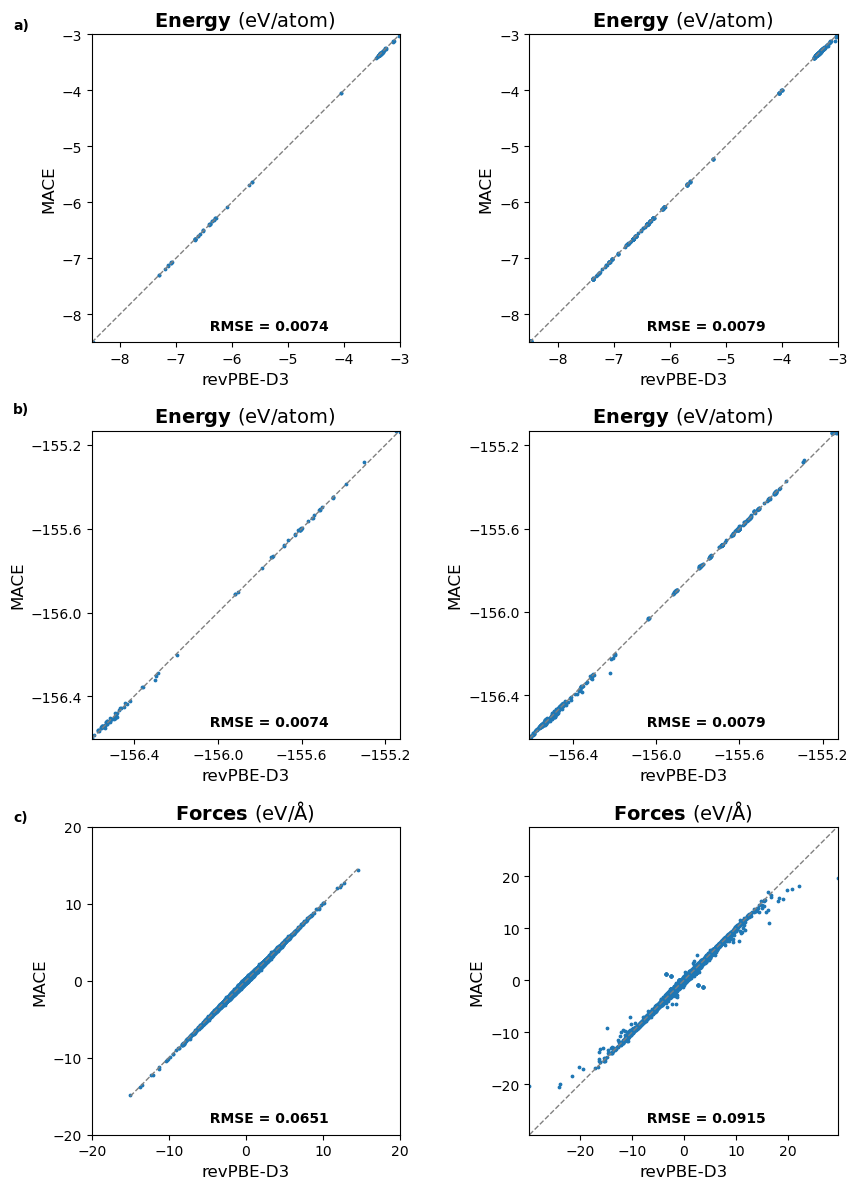

In [ ]:
plot_RMSEs_combined(train_data_scratch_100, test_data_scratch_100, labs=['revPBE-D3', 'MACE'])

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/best_trained_from_scratch_energy_and_forces_compared_to_reference.png', dpi=300, bbox_inches='tight')

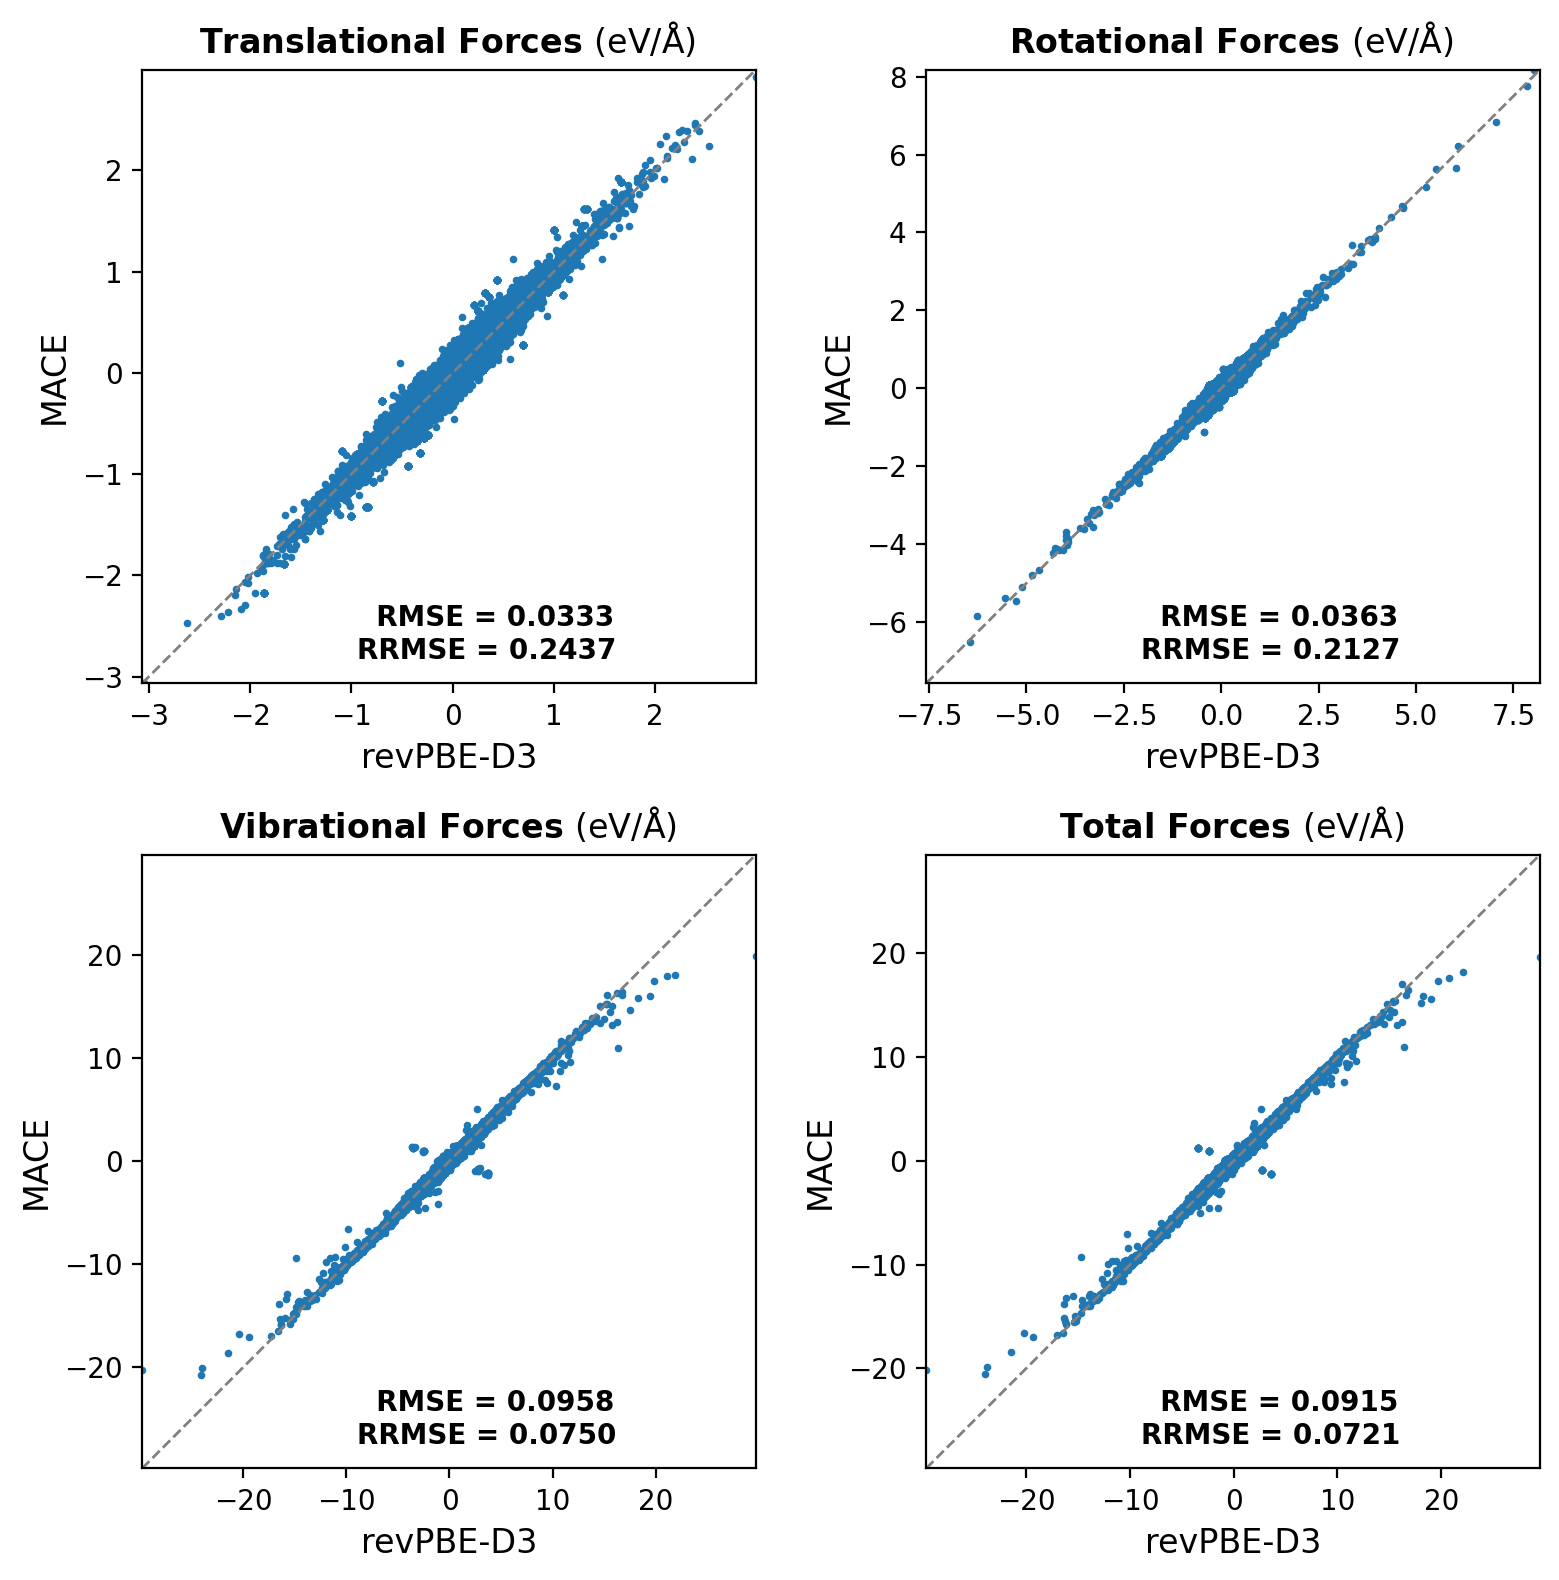

In [ ]:
db1 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_100_structures_test.xyz', ':')
ea.rename_prop_tag(db1, 'REF_energy', 'energy') 
ea.rename_prop_tag(db1, 'REF_forces', 'forces') 

db2 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/scratch_100_structures_test.xyz', ':')
ea.rename_prop_tag(db2, 'MACE_energy', 'energy') 
ea.rename_prop_tag(db2, 'MACE_forces', 'forces') 

aa.extract_molecs(db1, intra_inter=True)
aa.extract_molecs(db2, intra_inter=True)

pp.plot_trans_rot_vib(db1, db2, labs=['revPBE-D3', 'MACE'], fig_name = '/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/best_trained_from_scratch_separated_forces_compared_to_reference.png')

## Foundation model performance

In [ ]:
train_foundation_50 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/foundation_model_50_structures_train.xyz', ':')
test_foundation_50 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/foundation_model_50_structures_test.xyz', ':')

In [132]:
def plot_only_forces_RMSEs(db_train, db_test, labs):
    
    
    ea.rename_prop_tag(db_train, 'MACE_energy', 'MACE_energy') 
    ea.rename_prop_tag(db_train, 'MACE_forces', 'MACE_forces') 
    
    ea.rename_prop_tag(db_test, 'MACE_energy', 'MACE_energy') 
    ea.rename_prop_tag(db_test, 'MACE_forces', 'MACE_forces') 

    fig = plt.figure(figsize=(9,12), dpi=100)
    
    # For best trained from scratch
    row_3_plots_ticks = [-25,-20,-15,-10,-5,0,5,10,15,20,25]
    
    
    ax5 = plt.subplot(1,2,1)
    pp.plot_prop(np.concatenate(ea.get_prop(db_train, 'arrays', 'REF_forces')).flatten(), \
                 np.concatenate(ea.get_prop(db_train, 'arrays', 'MACE_forces')).flatten(), \
                 title=r'Forces $\rm (eV/\AA)$ ', labs=labs, rel=False)
    ax5.set_xticks(row_3_plots_ticks)
    ax5.set_yticks(row_3_plots_ticks)
    
    ax6 = plt.subplot(1,2,2)
    pp.plot_prop(np.concatenate(ea.get_prop(db_test, 'arrays', 'REF_forces')).flatten(), \
                    np.concatenate(ea.get_prop(db_test, 'arrays', 'MACE_forces')).flatten(), \
                    title=r'Forces $\rm (eV/\AA)$ ', labs=labs, rel=False)
    ax6.set_xticks(row_3_plots_ticks)
    ax6.set_yticks(row_3_plots_ticks)
    
    # fig.text(0.04, 0.98, 'a)', ha='center', va='top', fontsize=10, fontweight="bold")
    # fig.text(0.04, 0.66, 'b)', ha='center', va='top', fontsize=10, fontweight="bold")
    # fig.text(0.04, 0.32, 'c)', ha='center', va='top', fontsize=10, fontweight="bold")


    plt.tight_layout()
    
    return

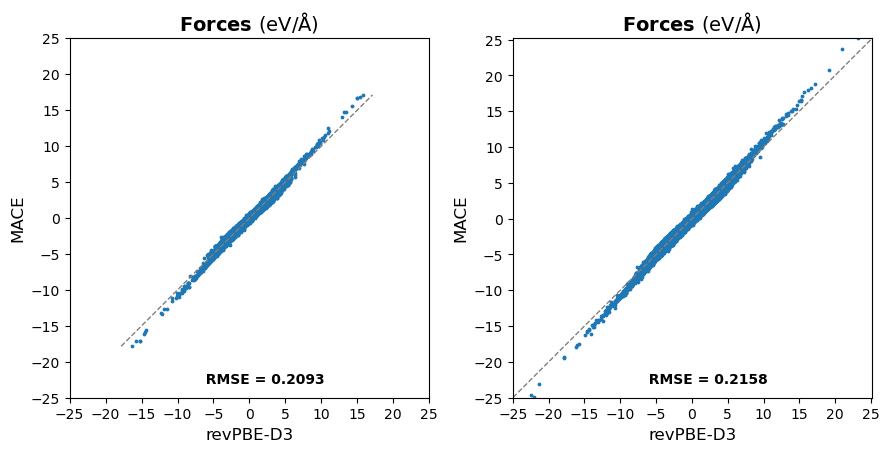

In [ ]:
plot_only_forces_RMSEs(train_foundation_50, test_foundation_50, labs=['revPBE-D3', 'MACE'])

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/foundation_model_force_performance_compared_to_reference.png', dpi=300, bbox_inches='tight')

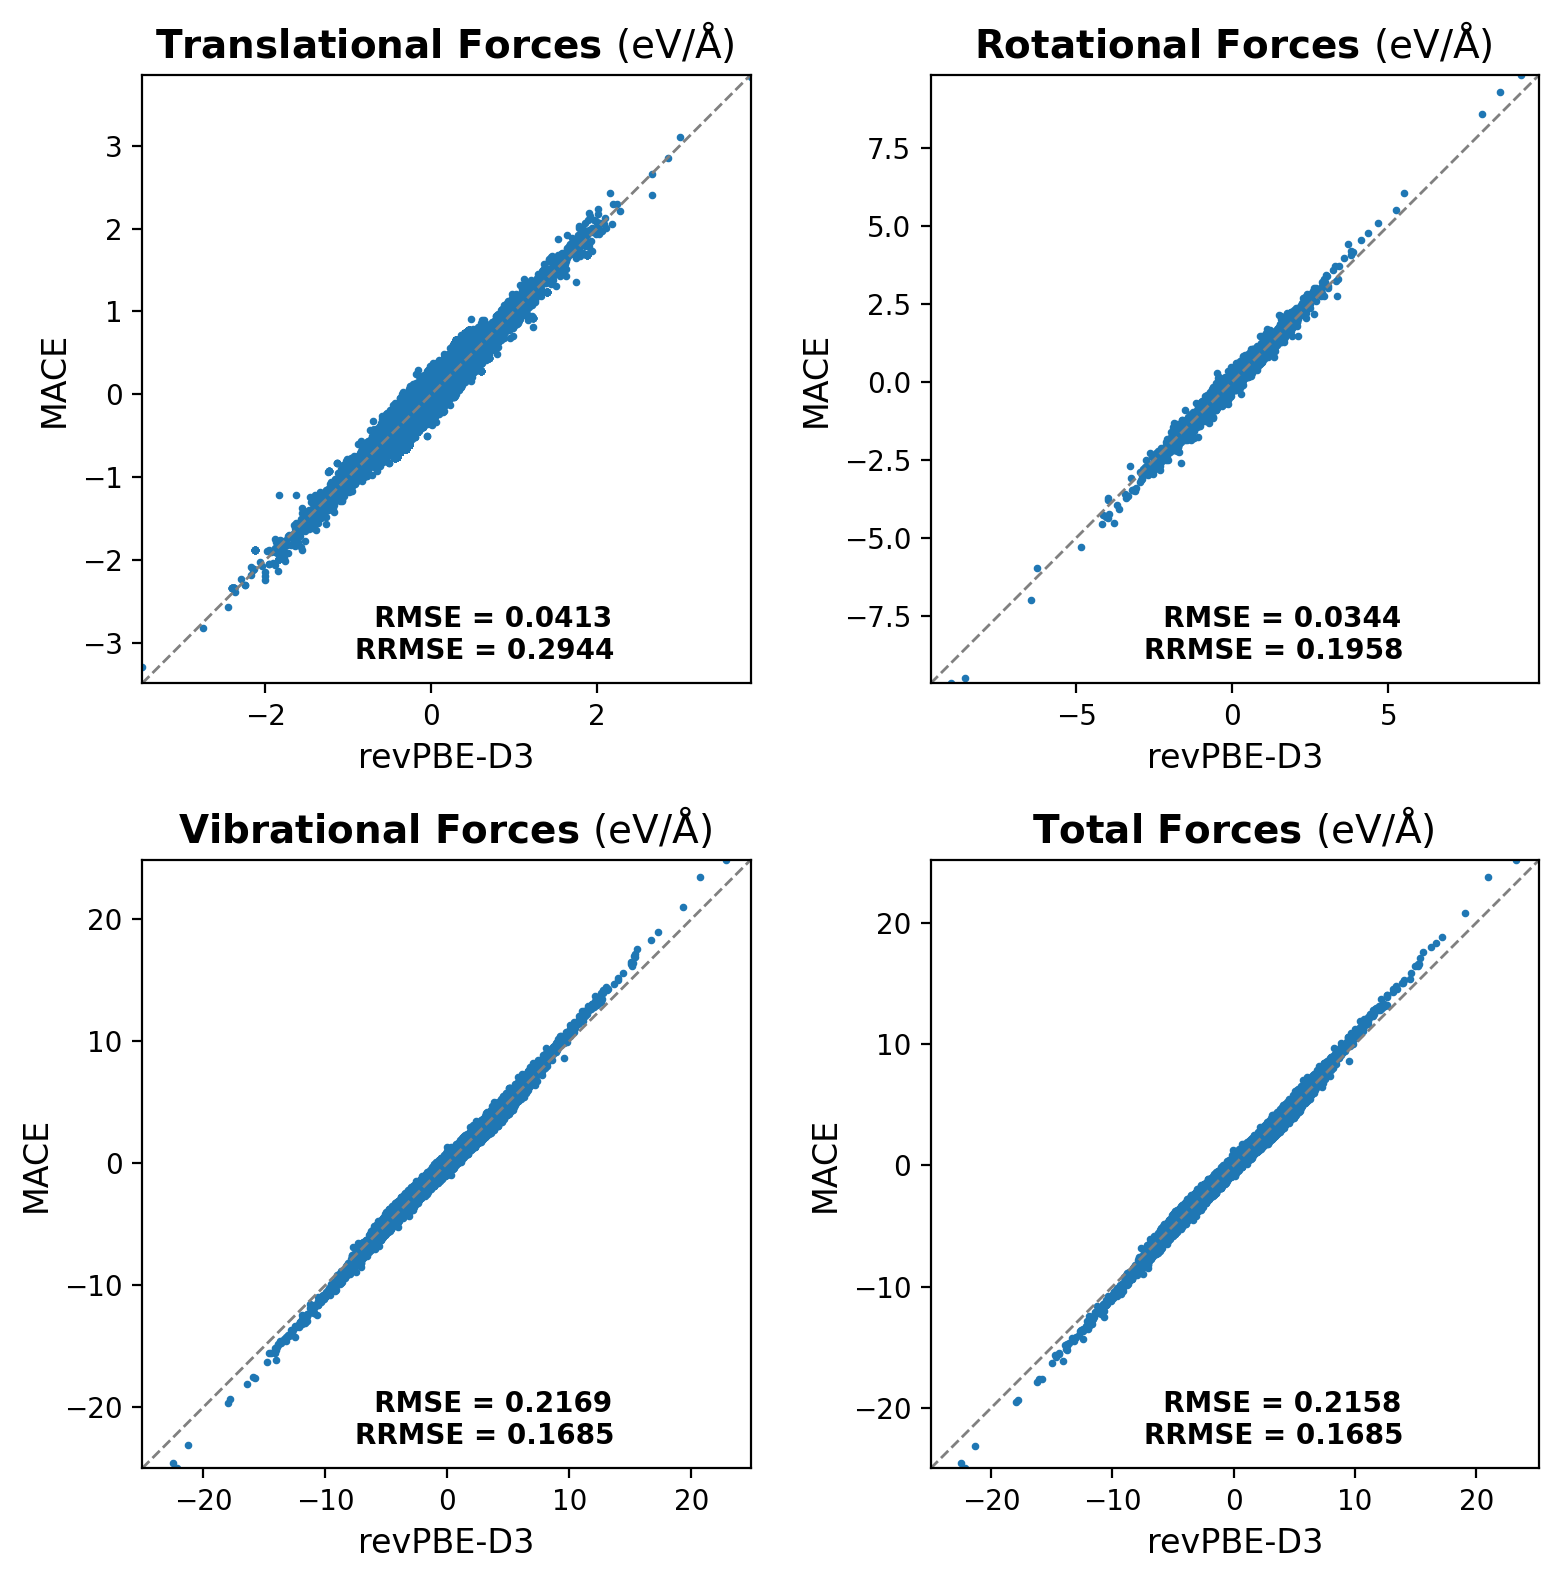

In [ ]:
db1 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/foundation_model_50_structures_test.xyz', ':')
ea.rename_prop_tag(db1, 'REF_energy', 'energy') 
ea.rename_prop_tag(db1, 'REF_forces', 'forces') 

db2 = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/evaluation_data_outputs/foundation_model_50_structures_test.xyz', ':')
ea.rename_prop_tag(db2, 'MACE_energy', 'energy') 
ea.rename_prop_tag(db2, 'MACE_forces', 'forces') 

aa.extract_molecs(db1, intra_inter=True)
aa.extract_molecs(db2, intra_inter=True)

pp.plot_trans_rot_vib(db1, db2, labs=['revPBE-D3', 'MACE'], fig_name = '/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/foundation_model_performance_forces_split_compared_to_reference.png')

## Compare Dynamics from MD to accurate methods (DFT)

- Nanoconfined water setups

     - Which setups should we simulate, 1, 2, 3, 4 and 5 water layers between graphene sheets.

     - Evaluating properties of five systems involving average slit widths of about 6.5, 9.2, 12.2, 14.7, 19.7 Å respectively for the layers of waters stated above.

     **I need to identify structures with 1, 2 and 3 water layers to simulate!**

In [ ]:
nanoconfined_water_systems = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/gra-wat-protonic-defects/confined_water_structures_only.xyz", index = ":")

In [10]:
nanoconfined_water_systems[100].wrap()

In [11]:
nv.show_ase(nanoconfined_water_systems[100])

NGLWidget()

In [ ]:
for atoms in nanoconfined_water_systems:
    if len(atoms[atoms.symbols == 'H'])% 2 != 0:
        print(len(atoms[atoms.symbols == 'H']))

In [94]:
len(nanoconfined_water_systems[100][nanoconfined_water_systems[100].symbols == 'H'])

96

- Number of nanoconfined structures

In [136]:
len(nanoconfined_water_systems)

3101

- Analysis based on slit width (distance between graphene sheets)

In [14]:
interlayer_distances_list = []

for system in nanoconfined_water_systems:
    
    carbon_atoms = [atom for atom in system if atom.symbol == "C"]

    z_coordinates = np.array([atom.position[2] for atom in carbon_atoms])

    layer1 = np.array([atom.position for atom in carbon_atoms if atom.position[2] < np.median(z_coordinates)])
    layer2 = np.array([atom.position for atom in carbon_atoms if atom.position[2] >= np.median(z_coordinates)])

    min_interlayer_distance = np.min(cdist(layer1, layer2))
    
    interlayer_distances_list.append(min_interlayer_distance)


In [111]:
len(interlayer_distances_list)

3101

- 1 layer

In [112]:
lower_bound = 6.0
upper_bound = 6.7

filtered_values_1_layer = [x for x in interlayer_distances_list if lower_bound <= x <= upper_bound]

print(filtered_values_1_layer)  

[6.246045081308839, 6.293676008602525, 6.423234028192876, 6.1260094067882545, 6.3808915054386945, 6.287170006392897, 6.301385472604654, 6.090434129210299, 6.265021600896071, 6.334496287620235, 6.098976182737602, 6.292163500485835, 6.466681602675453, 6.2891751008097545, 6.372186093992146, 6.113815164572251, 6.03913965292806, 6.213544602951898, 6.233651877007318, 6.264886554374098, 6.188380798339473, 6.35132694981038, 6.318415105561263, 6.104484276719532, 6.435498211268536, 6.326774053625669, 6.341252734633667, 6.081932453401717, 6.22951116324747, 6.231952405639908, 6.484706141059327, 6.357599879289534, 6.410011222938248, 6.129068010041931, 6.023553687515601, 6.12755681679821, 6.217051400052419, 6.051253681762274, 6.378642827940029, 6.238204122699708, 6.058156024424082, 6.151998396587354, 6.203738993860184, 6.346740770974814, 6.286112891272715, 6.352748806143572, 6.242256524533506, 6.311248241948849, 6.144164577750718, 6.131162803390931, 6.27230717798723, 6.0629687902153595, 6.4242097696

In [121]:
interlayer_distances_list.index(6.079044082857576)

2996

In [124]:
identify_extreme_charged_species(nanoconfined_water_systems[2996])


{'charged_species': 'hydroxide',
 'charged_z': -0.41039930258333257,
 'neutral_water_z': [-0.28999031258333297,
  0.08659229741666685,
  0.2794720974166651,
  -0.26071782258333265,
  0.27605572741666506,
  0.3719733274166668,
  0.18429534741666487,
  -0.23959465258333346,
  -0.1914686325833337,
  0.18515260741666317],
 'missing_extreme_index': 0}

In [179]:
nanoconfined_water_systems[2799]

Atoms(symbols='C120H30O15', pbc=True, cell=[12.350000183049772, 12.833998889261723, 21.000002305849744], REF_forces=..., initial_charges=..., initial_magmoms=...)

In [123]:
nanoconfined_water_systems[2996].wrap()

In [125]:
view(nanoconfined_water_systems[2996], viewer = 'x3d')

- Check this system isn't in the training or validation sets (by reference energy)

In [126]:
nanoconfined_water_systems[2996].info

{'REF_energy': -23780.173759544425}

Not present in `bulk_and_confined_datasets_training_30` or `bulk_and_confined_datasets_training_50` training set or validation set, use and comment in report

- Is it neutral, basic or acidic?

In [38]:
def identify_extreme_charged_species(atoms):
    no_extreme_index = 0
    
    #Ensure correct pbs
    atoms.set_scaled_positions(atoms.get_scaled_positions()) 
    
    positions = atoms.positions
    
    carbon_atoms = atoms[atoms.symbols == 'C']

    center_of_mass = carbon_atoms.get_center_of_mass()
    
    oxygen_indices = [atom.index for atom in atoms if atom.symbol == "O"]
    hydrogen_indices = [atom.index for atom in atoms if atom.symbol == "H"]
    
    positions = positions - center_of_mass
    oxygen_positions = positions[oxygen_indices] - center_of_mass
    hydrogen_positions = positions[hydrogen_indices] - center_of_mass
    
    distances = cdist(hydrogen_positions, oxygen_positions)

    closest_oxygen_indices = np.argmin(distances, axis=1) 

    hydrogen_count_per_oxygen = Counter(closest_oxygen_indices)

    # Find possible hydronium and hydroxide candidates
    hydronium_candidates = [O_idx for O_idx in hydrogen_count_per_oxygen if hydrogen_count_per_oxygen[O_idx] == 3]
    hydroxide_candidates = [O_idx for O_idx in hydrogen_count_per_oxygen if hydrogen_count_per_oxygen[O_idx] == 1]
    
    # Identify the most extreme ion along z-axis
    charged_species = None
    charged_z = None
    extreme_z_index = None

    if hydronium_candidates and hydroxide_candidates:
        lowest_hydronium = min(hydronium_candidates, key=lambda idx: positions[oxygen_indices[idx], 2])
        highest_hydroxide = max(hydroxide_candidates, key=lambda idx: positions[oxygen_indices[idx], 2])

        if positions[oxygen_indices[lowest_hydronium], 2] < positions[oxygen_indices[highest_hydroxide], 2]:
            charged_species = "hydronium"
            charged_z = positions[oxygen_indices[lowest_hydronium], 2]
            extreme_z_index = lowest_hydronium
        else:
            charged_species = "hydroxide"
            charged_z = positions[oxygen_indices[highest_hydroxide], 2]
            extreme_z_index = highest_hydroxide

    elif hydronium_candidates:
        # Pick the most extreme hydronium - lowest z value.
        charged_species = "hydronium"
        charged_z = min((positions[oxygen_indices[idx], 2] for idx in hydronium_candidates))
        extreme_z_index = hydronium_candidates[np.argmin([positions[oxygen_indices[idx], 2] for idx in hydronium_candidates])]

    elif hydroxide_candidates:
        # Pick the most extreme hydroxide - highest z value.
        charged_species = "hydroxide"
        charged_z = max((positions[oxygen_indices[idx], 2] for idx in hydroxide_candidates))
        extreme_z_index = hydroxide_candidates[np.argmax([positions[oxygen_indices[idx], 2] for idx in hydroxide_candidates])]
        
    neutral_water_z = []
    for O_idx in oxygen_indices:
        if extreme_z_index is not None:
            if O_idx != oxygen_indices[extreme_z_index]:
                neutral_water_z.append(positions[O_idx, 2])
        else:
            no_extreme_index=1

    return {
        "charged_species": charged_species,  
        "charged_z": charged_z,
        "neutral_water_z": neutral_water_z,
        "missing_extreme_index":no_extreme_index
    }


In [120]:
identify_extreme_charged_species(nanoconfined_water_systems[3076])

{'charged_species': 'hydronium',
 'charged_z': -0.12311139508333824,
 'neutral_water_z': [-0.2849348450833382,
  0.14685258491665998,
  0.17587055491665993,
  0.5289894449166592,
  0.14642766491665782,
  -0.044962505083338655,
  -0.10025358508333859,
  -0.2238101150833387,
  -0.026700075083338604,
  -0.12882862508333837,
  0.020482954916657192,
  -0.3021182850833384,
  -0.3138591450833381,
  -0.13916875508333781],
 'missing_extreme_index': 0}

- Hydronium

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/structures_for_md_simulations/new_layer_1_water_graphene_system.xyz', nanoconfined_water_systems[2799])

- Hydroxide

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/structures_for_md_simulations/layer_1_hydroxide_water_graphene_system.xyz', nanoconfined_water_systems[2996])


- 2 Layers

Originally thought it was only 1 layer...

In [15]:
lower_bound = 8.8
upper_bound = 9.4

filtered_values_2_layers = [x for x in interlayer_distances_list if lower_bound <= x <= upper_bound]

print(filtered_values_2_layers)  

[9.322227050074266, 9.18929068742884, 9.264275084419369, 8.948171089642726, 8.801629032628817, 8.850139106047232, 8.891854711638095, 9.075667574738619, 9.230570475844276, 9.12004397545635, 9.008601089336391, 9.361528109686386, 9.05618827240895, 8.851415106604831, 8.907928394427838, 9.237662873289102, 8.819125549068238, 8.955441945022104, 9.023342218499605, 8.800081630369549, 8.826721262365137, 8.947573549763426, 9.349837442031157, 9.297489756070725, 8.939935171133891, 9.026143041760221, 9.059368038064472, 9.117056207085568, 9.224294958647924, 9.218049467167608, 8.968275889515866, 9.036874819737944, 9.32108046825101, 8.930496261806775, 8.88048466959582, 8.859336810542361, 9.197559300402505, 9.320049286156575, 8.886482707961195, 9.25291963670423, 9.071125377846348, 9.163847588411006, 9.351825272620673, 9.244707754659826, 9.151872025598026, 8.882078278183199, 8.837970564747508, 8.808348443367246, 8.879857580267071, 9.275459586323759, 8.832318909100726, 9.289255334299764, 9.075495597475951

In [22]:
for val in filtered_values_2_layers:
    index = interlayer_distances_list.index(val)
    
    ion = identify_extreme_charged_species(nanoconfined_water_systems[index])
    
    if ion['charged_species'] == 'hydronium':
        print(index)

0
42
45
47
50
58
67
104
106
112
132
148
165
187
199
207
227
246
253
256
257
320
337
350
405
418
419
426
447
470
481
502
503
506
516
546
555
567
586
591
592
593
607
612
629
634
640
679
693
727
729
763
793
812
837
857
876
878
880
881
904
907
911
928
933
954
962
972
974
992
997
1028
1033
1053
1062
1064
1075
1116
1154
1155
1163
1165
1179
1187
1191
1194
1210
1218
1227
1230
1235
1236
1246
1249
1253
1264
1269
1277
1291
1315
1321
1341
1368
1379
1381
1404
1411
1426
1427
1431
1451
1452
1468
1480
1486
1488
1491
1511
1516
1534
1589
1591
1594
1622
1636
1648
1651
1652
1656
1670
1685
1726
1735
1738
1746
1771
1773
1774
1818
1820
1854
1863
1926
1930
1935
1938
1962
1974
1985
2019
2026
2038
2070
2082
2136
2167
2184
2207
2210
2222
2232
2238
2250
2264
2265
2267
2281
2297
2298
2328
2331
2332
2333
2335
2337
2338
2339
2340
2348
2361
2387
2389
2393
2396
2405
2416
2417
2423
2437
2443
2447
2455
2461
2480
2483
2484
2487
2503
2508
2516
2526
2528
2562
2569
2608
2624
2652
2653
2659
2664
2668
2692
2709
2711
2712
2735

In [160]:
interlayer_distances_list.index(9.1107154256909)

1218

In [23]:
nanoconfined_water_systems[3069].wrap()

In [29]:
identify_extreme_charged_species(nanoconfined_water_systems[3064])


{'charged_species': 'hydronium',
 'charged_z': -1.8479618060833332,
 'neutral_water_z': [-1.3150597160833346,
  -1.2078499960833344,
  -1.2080664360833335,
  -1.588148496083333,
  1.6664178239166656,
  1.361493743916668,
  1.445868403916668,
  -1.267503086083332,
  1.6270041739166654,
  1.4904552939166678,
  -1.4886769360833334,
  1.6656933839166665,
  -1.3928011360833334,
  -1.6197080960833325,
  1.422908993916666,
  1.363640613916667,
  1.256519273916668,
  -1.3411539760833335,
  1.6860529439166658,
  1.3443431139166666,
  -1.1792257460833344,
  -1.1034777360833328,
  -1.0145801960833332,
  1.1927539539166663,
  0.9732644739166663,
  1.1685403839166657,
  -1.1000999960833333,
  1.0591393539166667,
  -1.346364776083334],
 'missing_extreme_index': 0}

In [25]:
nanoconfined_water_systems[3069]

Atoms(symbols='C320H186O93', pbc=True, cell=[19.759999869537868, 21.389997972377138, 34.999998198525994], REF_forces=..., initial_charges=..., initial_magmoms=...)

In [27]:
view(nanoconfined_water_systems[3064], viewer = 'x3d')

In [28]:
nanoconfined_water_systems[3064].info

{'REF_energy': -32706.403983885102}

- Hydronium

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/structures_for_md_simulations/actual_layer_2_water_graphene_system.xyz', nanoconfined_water_systems[3064])

- Hydroxide

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/structures_for_md_simulations/layer_2_hydroxide_water_graphene_system.xyz', nanoconfined_water_systems[2924])


- 3 layers

In [169]:
lower_bound = 11.6
upper_bound = 13

filtered_values_3_layers = [x for x in interlayer_distances_list if lower_bound <= x <= upper_bound]

print(filtered_values_3_layers)  

[12.055927361499498, 12.37966084193945, 12.679916257182912, 12.508500800682999, 12.25145265798396, 12.968137320047942, 12.56089562458712, 12.58324199843283, 12.560586717925775, 12.242217199472242, 12.136997786514742, 12.850175212371061, 12.389554848591912, 12.168659199794446, 12.434829017692755, 12.605974807200873, 12.346081375146733, 12.872290253349785, 12.30557416, 12.01365138600269, 12.387203561687107, 12.517968854069412, 12.07527390126133, 12.432151766228097, 12.826827832172468, 12.557579719859795, 12.241504412798072, 12.821335821165231, 12.435209823493716, 12.885909533089368, 12.763773695637205, 12.370805844832976, 12.320079480585834, 12.523885782482735, 12.432441798262166, 12.839184218821497, 12.756921024748017, 12.329470291392555, 12.033947268522594, 12.734728876064938, 12.622728924377837, 12.77814188046216, 12.933024536711855, 12.924638934665944, 12.149046603444962, 12.560472295911406, 12.479377187673492, 12.853666275261423, 12.32837936049556, 11.996601662336278, 12.64729809343

In [170]:
for val in filtered_values_3_layers:
    index = interlayer_distances_list.index(val)
    
    ion = identify_extreme_charged_species(nanoconfined_water_systems[index])
    
    if ion['charged_species'] == 'hydroxide':
        print(index)

956
1305


In [174]:
identify_extreme_charged_species(nanoconfined_water_systems[956])

{'charged_species': 'hydroxide',
 'charged_z': 0.11943157791666437,
 'neutral_water_z': [0.9901196579166651,
  3.270537407916663,
  -0.10312871208333796,
  -3.6443503220833353,
  2.613782447916666,
  -0.63024371208334,
  -3.436192642083336,
  3.224524387916663,
  -2.065306162083335,
  3.419359497916666,
  -0.6854802920833389,
  3.186594027916666,
  1.5519751479166626,
  -0.9301538420833353,
  3.6625084879166643,
  3.1616348579166633,
  -3.0447645020833356,
  -3.1317956320833353,
  -0.8379547720833393,
  -3.4186154920833385,
  -1.4068266220833348,
  3.7401758279166657,
  3.680184067916656,
  -3.390274882083336,
  3.32318947791666,
  1.928678937916665,
  3.8857217879166654,
  -2.6347019020833375,
  -3.0424636320833347,
  -3.3728914120833355,
  1.8234700479166648,
  -3.3468765320833356,
  -0.7386377320833386,
  0.1453009379166641,
  0.6503550779166627,
  0.616770847916662,
  0.811736667916664,
  2.8896875079166655,
  -3.1788177820833354,
  -2.9930638820833355,
  -1.6553689820833348,
  -3.

In [30]:
interlayer_distances_list.index(12.24870002687278)

2432

In [ ]:
nanoconfined_water_systems[2432]

Atoms(symbols='C120H40O20', pbc=True, cell=[12.350000183049772, 12.833998889261723, 24.999999922780763], REF_forces=..., initial_charges=..., initial_magmoms=...)

In [172]:
view(nanoconfined_water_systems[956], viewer = 'x3d')

- Check this system isn't in the training or validation sets (by reference energy)

In [32]:
nanoconfined_water_systems[2432].info

{'REF_energy': -41159.9467726455}

Not present in `bulk_and_confined_datasets_training_30` or `bulk_and_confined_datasets_training_50` training set or validation set, use and comment in report

In [210]:
identify_extreme_charged_species(nanoconfined_water_systems[2432])

{'charged_species': 'hydronium', 'charged_z': 10.85201856}

- Hydronium

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/structures_for_md_simulations/layer_3_water_graphene_system.xyz', nanoconfined_water_systems[2432])

- Hydroxide

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/structures_for_md_simulations/layer_3_hydroxide_water_graphene_system.xyz', nanoconfined_water_systems[956])


- 5 layers

In [ ]:
lower_bound = 17
upper_bound = 20.2

filtered_values_5_layers = [x for x in interlayer_distances_list if lower_bound <= x <= upper_bound]

print(filtered_values_5_layers)  

In [190]:
## test
interlayer_distances_list.index(17.00596705902919)

39

In [60]:
interlayer_distances_list.index(17.123122321791325)

2660

In [61]:
nanoconfined_water_systems[2660]

Atoms(symbols='C120H140O70', pbc=True, cell=[12.350000183049772, 12.833998889261723, 39.99999892393024], REF_forces=..., initial_charges=..., initial_magmoms=...)

In [64]:
nv.show_ase(nanoconfined_water_systems[2660])

NGLWidget()

- Check this system isn't in the training or validation sets (by reference energy)

In [65]:
nanoconfined_water_systems[2660].info

{'REF_energy': -51491.34916132173}

Not present in `bulk_and_confined_datasets_training_30` or `bulk_and_confined_datasets_training_50` training set or validation set, use and comment in report

In [226]:
identify_extreme_charged_species(nanoconfined_water_systems[2660])

{'charged_species': None, 'charged_z': None}

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/structures_for_md_simulations/layer_5_water_graphene_system.xyz', nanoconfined_water_systems[2660])

## Visualizing and analysis of trajectories

- Function to track ions

In [11]:
def identify_ions_and_water(atoms, ion_type):

    carbon_atoms = atoms[atoms.symbols == 'C']

    center_of_mass = carbon_atoms.get_center_of_mass()
    
    oxygen_indices = [atom.index for atom in atoms if atom.symbol == 'O']
    hydrogen_indices = [atom.index for atom in atoms if atom.symbol == 'H']

    positions = atoms.positions - center_of_mass
    oxygen_positions = positions[oxygen_indices] 
    hydrogen_positions = positions[hydrogen_indices]

    distances = cdist(hydrogen_positions, oxygen_positions)

    closest_oxygen_indices = np.argmin(distances, axis=1)

    hydrogen_count_per_oxygen = Counter(closest_oxygen_indices)

    hydronium_z_positions = []
    hydroxide_z_positions = []
    neutral_water_from_acidic_system_z_positions = []
    neutral_water_from_basic_system_z_positions = []

    if ion_type == 'hydronium':
        for O_idx, count in hydrogen_count_per_oxygen.items():
            if count == 2:
                neutral_water_from_acidic_system_z_positions.append(oxygen_positions[O_idx, 2])
            elif count == 3:
                hydronium_z_positions.append(oxygen_positions[O_idx, 2])
    elif ion_type == 'hydroxide':
        for O_idx, count in hydrogen_count_per_oxygen.items():
            if count == 2:
                neutral_water_from_basic_system_z_positions.append(oxygen_positions[O_idx, 2])
            elif count == 1:
                hydroxide_z_positions.append(oxygen_positions[O_idx, 2])
    else:
        print('Please select a valid ion type for system.')
    

    if ion_type == "hydronium":
        return {
            "hydronium_z_positions": hydronium_z_positions,
            "neutral_water_z_positions": neutral_water_from_acidic_system_z_positions
        }
    elif ion_type == "hydroxide":
        return {
            "hydroxide_z_positions": hydroxide_z_positions,
            "neutral_water_z_positions": neutral_water_from_basic_system_z_positions
        }
    else:
        print("Please specify 'hydronium' or 'hydroxide' for the ion_type argument.")
        return {}

In [256]:
result = identify_ions_and_water(gra_water_1_layer_defects_traj[1000], ion_type="hydronium")

print(f"Hydronium ions (H₃O⁺) Z-positions: {result['hydronium_z_positions']}")
print(f"Neutral water molecules (H₂O) Z-positions: {result['neutral_water_z_positions']}")

Hydronium ions (H₃O⁺) Z-positions: [0.023332940916661826]
Neutral water molecules (H₂O) Z-positions: [0.18419720091666036, -0.02221113908333905, -0.05153601908333805, -0.2563173090833395, 0.05452688091666147, -0.2599809490833387, -0.010508229083338705, -0.10370613908333937, -0.1791713690833383, -0.128418939083339, -0.3427081090833397, 0.0006654409166610975, 0.01149506091666197]


**Make sure to correctly and reliably identify the hydronium/hydroxide ions in each frame!!!** 

    - Look at the 'most extreme' method looked at above...

## Trajectory

### 1 water layer


In [ ]:
gra_water_1_layer_hydronium_defects_traj = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/layers_1_hydronium/full-prod-traj-0.xyz', index = "::100")

In [5]:
gra_water_1_layer_hydronium_defects_traj = gra_water_1_layer_hydronium_defects_traj[:1001]

In [6]:
len(gra_water_1_layer_hydronium_defects_traj)

1001

In [ ]:
gra_water_1_layer_hydroxide_defects_traj = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/layers_1_hydroxide/prod-traj-0.xyz', index = "::100")


In [8]:
for frame in gra_water_1_layer_hydronium_defects_traj:
    frame.wrap()

for frame in gra_water_1_layer_hydroxide_defects_traj:
    frame.wrap()

In [9]:
len(gra_water_1_layer_hydronium_defects_traj)

1001

In [ ]:
# for atoms in gra_water_1_layer_defects_traj:
#     atoms.wrap()

In [ ]:
nv.show_asetraj(gra_water_1_layer_hydronium_defects_traj)

NGLWidget(max_frame=1000)

- Number of atoms in system

In [ ]:
len(gra_water_1_layer_hydronium_defects_traj)

1001

In [ ]:
view(gra_water_1_layer_hydronium_defects_traj[0], viewer = 'x3d')

In [ ]:
identify_extreme_charged_species(gra_water_1_layer_hydronium_defects_traj[700])

{'charged_species': 'hydronium',
 'charged_z': -0.029178510916670675,
 'neutral_water_z': [0.21804272908332933,
  0.3477538590833298,
  0.006102759083329801,
  -0.07536637091667053,
  0.07132316908332825,
  0.21201686908332817,
  0.1896525890833285,
  -0.10056689091667081,
  0.04849657908332894,
  0.010371319083329666,
  -0.1211192409166717,
  -0.01370089091667026,
  0.20512852908332846,
  -0.11803218091667134],
 'missing_extreme_index': 0}

- Plots and analysis

**This is with the new function...**

In [51]:
hydronium_z_centred = []
hydroxide_z_centred = []
neutral_waters_list_z = []

for atoms in gra_water_1_layer_hydronium_defects_traj:
    frame_result = identify_ions_and_water(atoms, 'hydronium')
    hydronium_z_centred.append(frame_result['hydronium_z_positions'])
    
    neutral_waters_list_z.append(frame_result['neutral_water_z_positions'])
    
for atoms in gra_water_1_layer_hydroxide_defects_traj:
    frame_result = identify_ions_and_water(atoms, 'hydroxide')
    hydroxide_z_centred.append(frame_result['hydroxide_z_positions'])
    
    neutral_waters_list_z.append(frame_result['neutral_water_z_positions'])

flattened_hydronium_z_centred = [item for sublist in hydronium_z_centred for item in sublist]
flattened_hydroxide_z_centred = [item for sublist in hydroxide_z_centred for item in sublist]
flattened_neutral_waters_list_z_centred = [item for sublist in neutral_waters_list_z for item in sublist]

In [50]:
print(len(flattened_neutral_waters_list_z_centred))
print(len(flattened_hydronium_z_centred))
print(len(flattened_hydroxide_z_centred))

72593
5428
5043


In [360]:
len(hydronium_z_centred_alt)

894

In [44]:
hydronium_z_centred_alt = []

no_extreme_index_count = 0

for atoms in gra_water_1_layer_hydronium_defects_traj:
    frame = identify_extreme_charged_species(atoms)
    
    if frame['charged_z'] is not None:
        hydronium_z_centred_alt.append(frame['charged_z'])
        
    
    extreme_index_missing = frame['missing_extreme_index']
    no_extreme_index_count+=extreme_index_missing


print(no_extreme_index_count)

# flattened_hydronium_z_centred_alt = [item for sublist in hydronium_z_centred_alt for item in sublist]

107


In [46]:
len(hydronium_z_centred_alt)

894

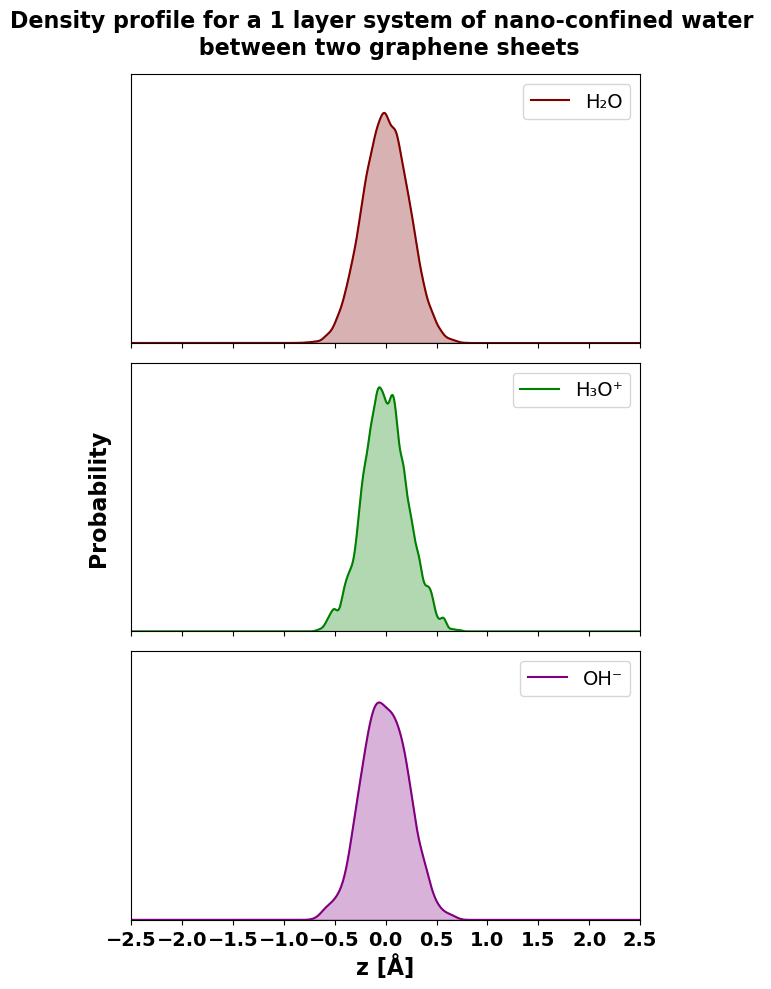

In [ ]:
# Define z-axis range for KDE smoothing

z_smooth_1_layer = np.linspace(-4, 4, 1000)

# Compute KDE (smoothed density distributions)
kde_H3O_1_layer = gaussian_kde(flattened_hydronium_z_centred, bw_method=0.12)
kde_OH_1_layer = gaussian_kde(flattened_hydroxide_z_centred, bw_method="scott")
kde_H2O_1_layer = gaussian_kde(flattened_neutral_waters_list_z_centred, bw_method="scott")

# Normalize densities
density_hydronium_1_layer = kde_H3O_1_layer(z_smooth_1_layer)
density_hydroxide_1_layer = kde_OH_1_layer(z_smooth_1_layer)
density_H2O_1_layer = kde_H2O_1_layer(z_smooth_1_layer)

density_hydronium_1_layer /= np.trapz(density_hydronium_1_layer, z_smooth_1_layer)
density_hydroxide_1_layer /= np.trapz(density_hydroxide_1_layer, z_smooth_1_layer)
density_H2O_1_layer /= np.trapz(density_H2O_1_layer, z_smooth_1_layer)

max_density_value = max(*density_hydronium_1_layer, *density_hydroxide_1_layer, *density_H2O_1_layer)
max_density_value = max(*density_hydronium_1_layer, *density_hydroxide_1_layer, *density_H2O_1_layer)

density_hydronium_1_layer /= max_density_value
density_hydroxide_1_layer /= max_density_value
density_H2O_1_layer /= max_density_value

fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(6, 10), sharex=True)

ax1.plot(z_smooth_1_layer, density_H2O_1_layer, color="maroon", label="H₂O")
ax1.fill_betweenx(density_H2O_1_layer, 20, z_smooth_1_layer, color="maroon", alpha=0.3) 
ax1.set_yticks([])
ax1.set_ylim(top = 1.1, bottom = 0)
ax1.legend()

ax2.plot(z_smooth_1_layer, density_hydronium_1_layer, color="green", label=unicodeit.replace("H_3O^+"))
ax2.fill_betweenx(density_hydronium_1_layer, 20, z_smooth_1_layer, color="green", alpha=0.3) 
ax2.set_ylabel("Probability", fontweight = "bold", labelpad = 15)
ax2.set_yticks([])
ax2.set_ylim(top = 1.1, bottom = 0)
ax2.legend()

ax3.plot(z_smooth_1_layer, density_hydroxide_1_layer, color="purple", label=unicodeit.replace("OH^-"))
ax3.fill_betweenx(density_hydroxide_1_layer, 10, z_smooth_1_layer, color="purple", alpha=0.3) 
ax3.set_xlabel("z [Å]", fontweight = "bold")
ax3.set_yticks([])
ax3.set_ylim(top = 1.1, bottom = 0)
ax3.legend()

plt.xlim(left = - 2.5, right = 2.5)

plt.xticks([-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5], fontweight = "bold")

ax1.set_title("Density profile for a 1 layer system of nano-confined water \n between two graphene sheets", loc = "center", pad = 15, fontweight="bold")

plt.tight_layout()

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/density_profile_1_layer.png', dpi=300, bbox_inches='tight')

plt.show()

### 2 water layers

In [ ]:
gra_water_2_layer_hydronium_defects_traj = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/layers_2_hydronium/full-prod-traj-0.xyz', index = "::100")

In [15]:
len(gra_water_2_layer_hydronium_defects_traj)

2001

In [ ]:
gra_water_2_layer_hydronium_defects_traj[100].wrap()

In [403]:
nv.show_ase(gra_water_2_layer_hydronium_defects_traj[100])

NGLWidget()

In [ ]:
gra_water_2_layer_hydroxide_defects_traj = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/layers_2_hydroxide/prod-traj-0.xyz', index = "::100")


In [17]:
len(gra_water_2_layer_hydroxide_defects_traj)


1001

## Check the lengths when I load in...

In [18]:
for atoms in gra_water_2_layer_hydronium_defects_traj:
    atoms.wrap()

for atoms in gra_water_2_layer_hydroxide_defects_traj:
    atoms.wrap()

In [ ]:
nv.show_asetraj(gra_water_2_layer_hydronium_defects_traj)

- Number of atoms in system

In [418]:
len(gra_water_2_layer_hydronium_defects_traj)

268

In [ ]:
view(gra_water_2_layer_hydronium_defects_traj[0], viewer = 'x3d')

In [ ]:
identify_extreme_charged_species(gra_water_2_layer_hydronium_defects_traj[1000])

{'charged_species': 'hydronium',
 'charged_z': 1.3733122669999993,
 'neutral_water_z': [-1.2739286930000011,
  -1.6962674630000012,
  -1.588273333000001,
  1.6678850169999988,
  -1.660073183000001,
  1.4607396369999988,
  1.4646577969999992,
  1.5554493769999986,
  0.8638508669999991,
  1.2104001969999993,
  -1.4661872130000009,
  -1.656041543000001,
  -1.572491133000001,
  -1.4859272330000008,
  1.6317835469999986,
  -1.4341985430000008,
  1.777971416999999,
  1.0442767269999988,
  -1.4026003830000011]}

- Identify Z position of hydronium ion and Z positions for neutral waters for 1 layer of water system

In [87]:
hydronium_z_centred_alt = []

no_extreme_index_count = 0

for atoms in gra_water_2_layer_hydronium_defects_traj:
    frame = identify_extreme_charged_species(atoms)
    
    if frame['charged_z'] is not None:
        hydronium_z_centred_alt.append(frame['charged_z'])
        
    extreme_index_missing = frame['missing_extreme_index']
    no_extreme_index_count+=extreme_index_missing
    
#flattened_hydronium_z_centred_alt = [item for sublist in hydronium_z_centred_alt for item in sublist]

print(no_extreme_index_count)

10


In [88]:
len(hydronium_z_centred_alt)

1991

- New function

In [89]:
hydronium_z_centred = []
hydroxide_z_centred = []
neutral_waters_list_z = []

for atoms in gra_water_2_layer_hydronium_defects_traj:
    frame_result = identify_ions_and_water(atoms, 'hydronium')
    hydronium_z_centred.append(frame_result['hydronium_z_positions'])
    
    #neutral_waters_list_z.append(frame_result['neutral_water_z_positions'])
    
for atoms in gra_water_2_layer_hydroxide_defects_traj:
    frame_result = identify_ions_and_water(atoms, 'hydroxide')
    hydroxide_z_centred.append(frame_result['hydroxide_z_positions'])
    
    neutral_waters_list_z.append(frame_result['neutral_water_z_positions'])

flattened_hydronium_z_centred = [item for sublist in hydronium_z_centred for item in sublist]
flattened_hydroxide_z_centred = [item for sublist in hydroxide_z_centred for item in sublist]
flattened_neutral_waters_list_z_centred = [item for sublist in neutral_waters_list_z for item in sublist]

In [80]:
print(len(flattened_hydronium_z_centred))
print(len(flattened_hydroxide_z_centred))
print(len(flattened_neutral_waters_list_z_centred))

3445
3168
22975


- Why does wrapping atoms do this?

In [248]:
nv.show_asetraj(gra_water_2_layer_defects_traj)

NGLWidget(max_frame=1000)

- Centre on middle of graphene sheets

In [ ]:
# hydronium_z_centred = hydronium_z_centred - np.mean(hydronium_z_centred)

# flattened_neutral_waters_list_z_centred = flattened_neutral_waters_list_z_centred - np.mean(flattened_neutral_waters_list_z_centred)


In [91]:
combined_hydronium = flattened_hydronium_z_centred + hydronium_z_centred_alt

- Visualizing hydroxide density along the z-axis 

**Need to re run the hydronium/acidic system with actual 2 layer system!

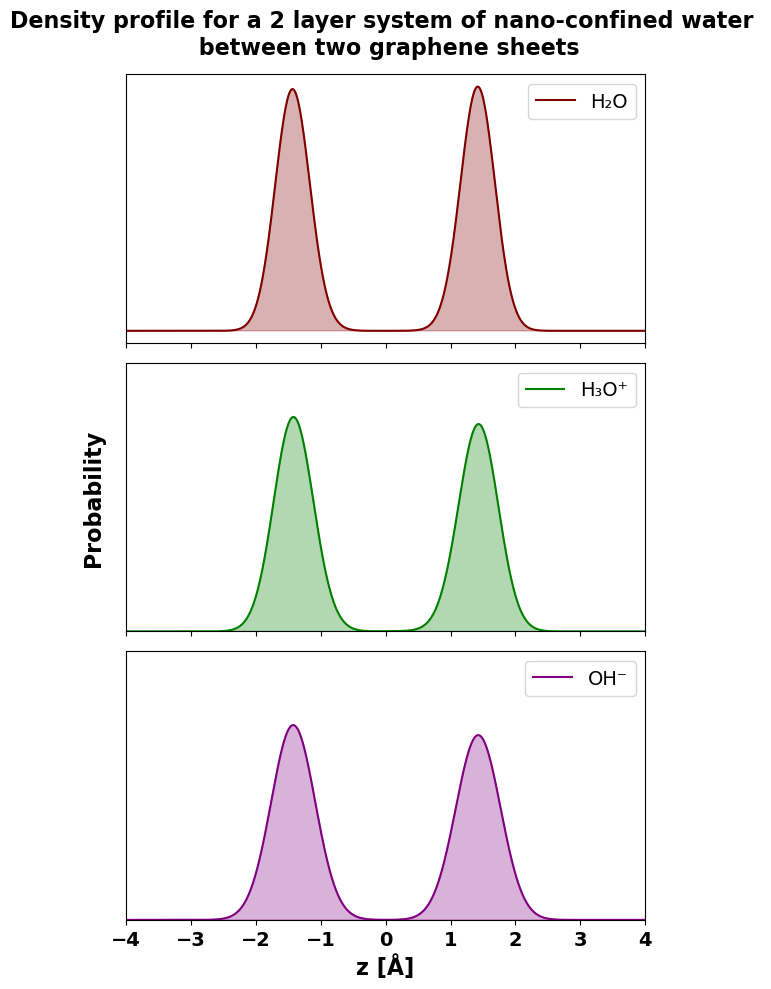

In [ ]:
# Define z-axis range for KDE smoothing

z_smooth_2_layers = np.linspace(-4, 4, 1000)

# Compute KDE (smoothed density distributions)
kde_H3O_2_layers = gaussian_kde(flattened_hydronium_z_centred, bw_method="scott")
kde_OH_2_layers = gaussian_kde(flattened_hydroxide_z_centred, bw_method="scott")
kde_H2O_2_layers = gaussian_kde(flattened_neutral_waters_list_z_centred, bw_method="scott")

# Normalize densities
density_hydronium_2_layers = kde_H3O_2_layers(z_smooth_2_layers)
density_hydroxide_2_layers = kde_OH_2_layers(z_smooth_2_layers)
density_H2O_2_layers = kde_H2O_2_layers(z_smooth_2_layers)

density_hydronium_2_layers /= np.trapz(density_hydronium_2_layers, z_smooth_2_layers)
density_hydroxide_2_layers /= np.trapz(density_hydroxide_2_layers, z_smooth_2_layers)
density_H2O_2_layers /= np.trapz(density_H2O_2_layers, z_smooth_2_layers)

max_density_value = max(*density_hydronium_2_layers, *density_hydroxide_2_layers, *density_H2O_2_layers)
max_density_value = max(*density_hydronium_2_layers, *density_hydroxide_2_layers, *density_H2O_2_layers)

density_hydronium_2_layers /= max_density_value
density_hydroxide_2_layers /= max_density_value
density_H2O_2_layers /= max_density_value

fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(6, 10), sharex=True)

ax1.plot(z_smooth_2_layers, density_H2O_2_layers, color="maroon", label="H₂O")
ax1.fill_betweenx(density_H2O_2_layers, 20, z_smooth_2_layers, color="maroon", alpha=0.3) 
ax1.set_yticks([])
#ax1.set_ylim(top = 1.1, bottom = 0)
ax1.legend()

ax2.plot(z_smooth_2_layers, density_hydronium_2_layers, color="green", label=unicodeit.replace("H_3O^+"))
ax2.fill_betweenx(density_hydronium_2_layers, 20, z_smooth_2_layers, color="green", alpha=0.3) 
ax2.set_ylabel("Probability", fontweight = "bold", labelpad = 15)
ax2.set_yticks([])
ax2.set_ylim(top = 1.1, bottom = 0)
ax2.legend()

ax3.plot(z_smooth_2_layers, density_hydroxide_2_layers, color="purple", label=unicodeit.replace("OH^-"))
ax3.fill_betweenx(density_hydroxide_2_layers, 10, z_smooth_2_layers, color="purple", alpha=0.3) 
ax3.set_xlabel("z [Å]", fontweight = "bold")
ax3.set_yticks([])
ax3.set_ylim(top = 1.1, bottom = 0)
ax3.legend()

plt.xlim(left = - 4, right = 4)

plt.xticks([-4,-3,-2,-1,0,1,2,3,4], fontweight = "bold")

ax1.set_title("Density profile for a 2 layer system of nano-confined water \n between two graphene sheets", loc = "center", pad = 15, fontweight="bold")

plt.tight_layout()

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/density_profile_2_layers.png', dpi=300, bbox_inches='tight')

plt.show()

## 3 Layers

In [ ]:
gra_water_3_layer_hydronium_defects_traj = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/layers_3_hydronium/prod-traj-0.xyz', index = "::100")

In [22]:
gra_water_3_layer_hydronium_defects_traj = gra_water_3_layer_hydronium_defects_traj[:1001]


In [23]:
len(gra_water_3_layer_hydronium_defects_traj)

1001

In [ ]:
gra_water_3_layer_hydroxide_defects_traj = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/layers_3_hydroxide/prod-traj-0.xyz', index = "::100")


In [25]:
gra_water_3_layer_hydroxide_defects_traj = gra_water_3_layer_hydroxide_defects_traj[:1001]

In [26]:
len(gra_water_3_layer_hydroxide_defects_traj)


1001

In [27]:
for frame in gra_water_3_layer_hydronium_defects_traj:
    frame.wrap()

for frame in gra_water_3_layer_hydroxide_defects_traj:
    frame.wrap()

In [ ]:
view(gra_water_3_layer_hydronium_defects_traj[0], viewer = 'x3d')

In [ ]:
nv.show_asetraj(gra_water_3_layer_hydronium_defects_traj)

NGLWidget(max_frame=1000)

- Number of atoms in system

In [ ]:
len(gra_water_3_layer_hydronium_defects_traj)

1001

- Identify charged species

In [191]:
identify_extreme_charged_species(gra_water_3_layer_hydronium_defects_traj[600])

{'charged_species': 'hydronium',
 'charged_z': -3.0816906431666737,
 'neutral_water_z': [-3.5309026831666728,
  -6.345944353166676,
  -5.046919603166673,
  -2.147163743166672,
  -2.1736210631666744,
  4.461853846833325,
  -6.495067563166673,
  3.7636802368333235,
  3.393902996833326,
  5.7839777168333235,
  6.454958826833327,
  -3.602051903166675,
  0.38692625683332693,
  -4.282229023166675,
  -0.9346418331666726,
  5.384783496833325,
  6.353138276833327,
  -1.2812003931666744,
  -3.445714453166673,
  -1.4476592431666724,
  5.686058916833321,
  -2.903068013166674,
  -4.8224532831666735,
  -3.2815979331666725,
  0.5114168868333273,
  1.7046873468333246,
  -0.11739990316667459,
  -6.010374063166676,
  6.146552816833328,
  -0.8427897831666726,
  2.190501686833322,
  0.7290659468333267,
  3.381268006833327,
  -4.639437903166673,
  -5.121339573166674,
  -6.625577723166673,
  -2.7265382031666725,
  3.0574665068333218,
  -0.45811334316667285,
  0.5435978368333281,
  -1.7798567531666727,
  0.1

- With new function???

In [94]:
hydronium_z_centred = []
hydroxide_z_centred = []
neutral_waters_list_z = []

for atoms in gra_water_3_layer_hydronium_defects_traj:
    frame_result = identify_ions_and_water(atoms, 'hydronium')
    hydronium_z_centred.append(frame_result['hydronium_z_positions'])
    
    neutral_waters_list_z.append(frame_result['neutral_water_z_positions'])
    
for atoms in gra_water_3_layer_hydroxide_defects_traj:
    frame_result = identify_ions_and_water(atoms, 'hydroxide')
    hydroxide_z_centred.append(frame_result['hydroxide_z_positions'])
    
    neutral_waters_list_z.append(frame_result['neutral_water_z_positions'])

flattened_hydronium_z_centred = [item for sublist in hydronium_z_centred for item in sublist]
flattened_hydroxide_z_centred = [item for sublist in hydroxide_z_centred for item in sublist]
flattened_neutral_waters_list_z_centred = [item for sublist in neutral_waters_list_z for item in sublist]

In [104]:
hydronium_z_centred_alt = []

no_extreme_index_count = 0

for atoms in gra_water_3_layer_hydronium_defects_traj:
    atoms.wrap()
    frame = identify_extreme_charged_species(atoms)
    
    if frame['charged_z'] is not None:
        hydronium_z_centred_alt.append(frame['charged_z'])
        
    
    extreme_index_missing = frame['missing_extreme_index']
    no_extreme_index_count+=extreme_index_missing
    

print(no_extreme_index_count)

1


In [105]:
len(hydronium_z_centred_alt)

1000

In [106]:
hydroxide_z_centred_alt = []

no_extreme_index_count = 0

for atoms in gra_water_3_layer_hydroxide_defects_traj:
    atoms.wrap()
    frame = identify_extreme_charged_species(atoms)
    
    if frame['charged_z'] is not None:
        hydroxide_z_centred_alt.append(frame['charged_z'])
        
    
    extreme_index_missing = frame['missing_extreme_index']
    no_extreme_index_count+=extreme_index_missing
    

print(no_extreme_index_count)

0


In [99]:
len(hydroxide_z_centred_alt)


1001

- Visualizing hydroxide density along the z-axis 

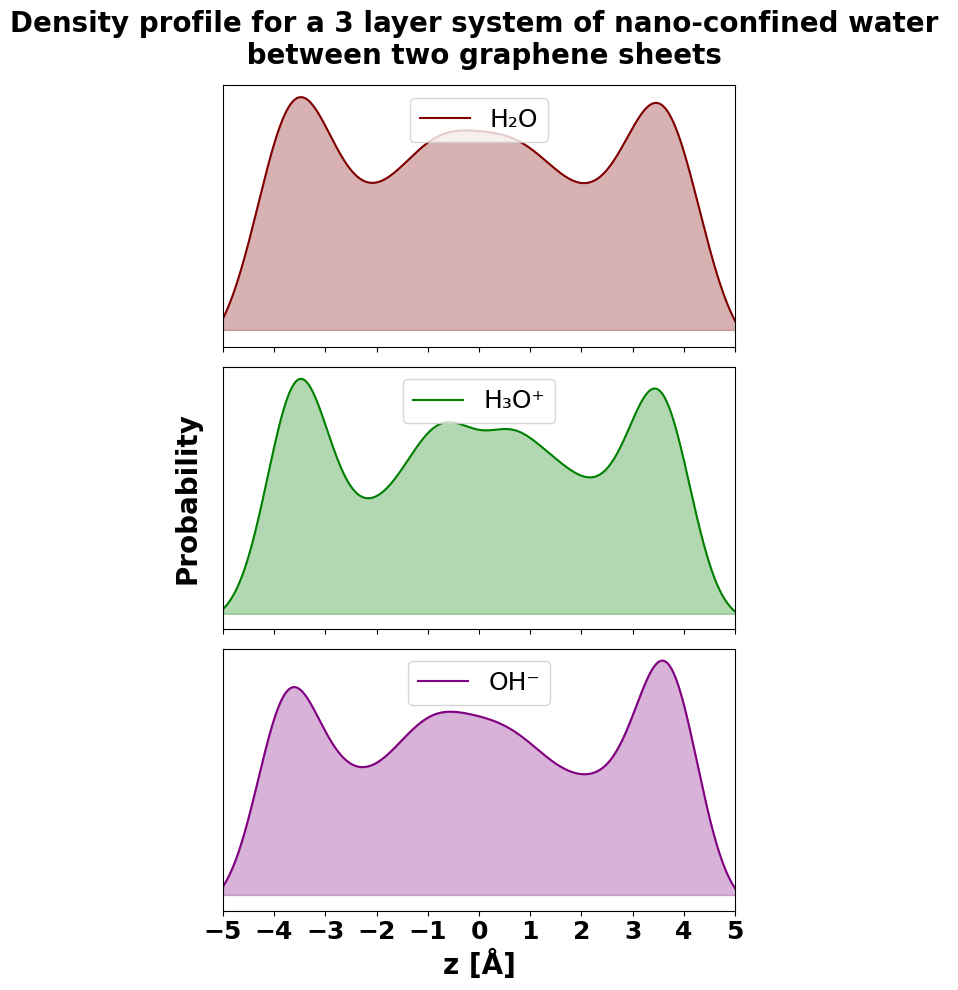

In [ ]:
# Define z-axis range for KDE smoothing

z_smooth_3_layers = np.linspace(min(flattened_neutral_waters_list_z_centred), max(flattened_neutral_waters_list_z_centred), 1000)

# Compute KDE (smoothed density distributions)
kde_H3O_3_layers = gaussian_kde(flattened_hydronium_z_centred, bw_method="scott")
kde_OH_3_layers = gaussian_kde(flattened_hydroxide_z_centred, bw_method="scott")
kde_H2O_3_layers = gaussian_kde(flattened_neutral_waters_list_z_centred, bw_method=0.23)

# Normalize densities
density_hydronium_3_layers = kde_H3O_3_layers(z_smooth_3_layers)
density_hydroxide_3_layers = kde_OH_3_layers(z_smooth_3_layers)
density_H2O_3_layers = kde_H2O_3_layers(z_smooth_3_layers)

density_hydronium_3_layers /= np.trapz(density_hydronium_3_layers, z_smooth_3_layers)
density_hydroxide_3_layers /= np.trapz(density_hydroxide_3_layers, z_smooth_3_layers)
density_H2O_3_layers /= np.trapz(density_H2O_3_layers, z_smooth_3_layers)

max_density_value = max(*density_hydronium_3_layers, *density_hydroxide_3_layers, *density_H2O_3_layers)
max_density_value = max(*density_hydronium_3_layers, *density_hydroxide_3_layers, *density_H2O_3_layers)

density_hydronium_3_layers /= max_density_value
density_hydroxide_3_layers /= max_density_value
density_H2O_3_layers /= max_density_value

fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(6, 10), sharex=True)

ax1.plot(z_smooth_3_layers, density_H2O_3_layers, color="maroon", label="H₂O")
ax1.fill_betweenx(density_H2O_3_layers, 20, z_smooth_3_layers, color="maroon", alpha=0.3) 
ax1.set_yticks([])
ax1.legend(loc = "upper center")

ax2.plot(z_smooth_3_layers, density_hydronium_3_layers, color="green", label=unicodeit.replace("H_3O^+"))
ax2.fill_betweenx(density_hydronium_3_layers, 20, z_smooth_3_layers, color="green", alpha=0.3) 
ax2.set_ylabel("Probability", fontweight = "bold", labelpad = 15)
ax2.set_yticks([])
ax2.legend(loc = "upper center")

ax3.plot(z_smooth_3_layers, density_hydroxide_3_layers, color="purple", label=unicodeit.replace("OH^-"))
ax3.fill_betweenx(density_hydroxide_3_layers, 10, z_smooth_3_layers, color="purple", alpha=0.3) 
ax3.set_xlabel("z [Å]", fontweight = "bold")
ax3.set_yticks([])
ax3.legend(loc = "upper center")

plt.xlim(left = - 5, right = 5)

plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], fontweight = "bold")

ax1.set_title("Density profile for a 3 layer system of nano-confined water \n between two graphene sheets", loc = "center", pad = 15, fontweight="bold")

plt.tight_layout()

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/density_profile_3_layers.png', dpi=300, bbox_inches='tight')

plt.show()

# Combine plots

In [135]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize':20,              
    'axes.labelsize': 20,              
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,             
    'legend.fontsize': 18,            
    'figure.titlesize': 18,            
})

In [31]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [ ]:
image_files = ["/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/nanoconfined_water_1_layer_image.png", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/nanoconfined_water_2_layer_image.png", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/nanoconfined_water_3_layer_image.png"]  
images = [mpimg.imread(img) for img in image_files]

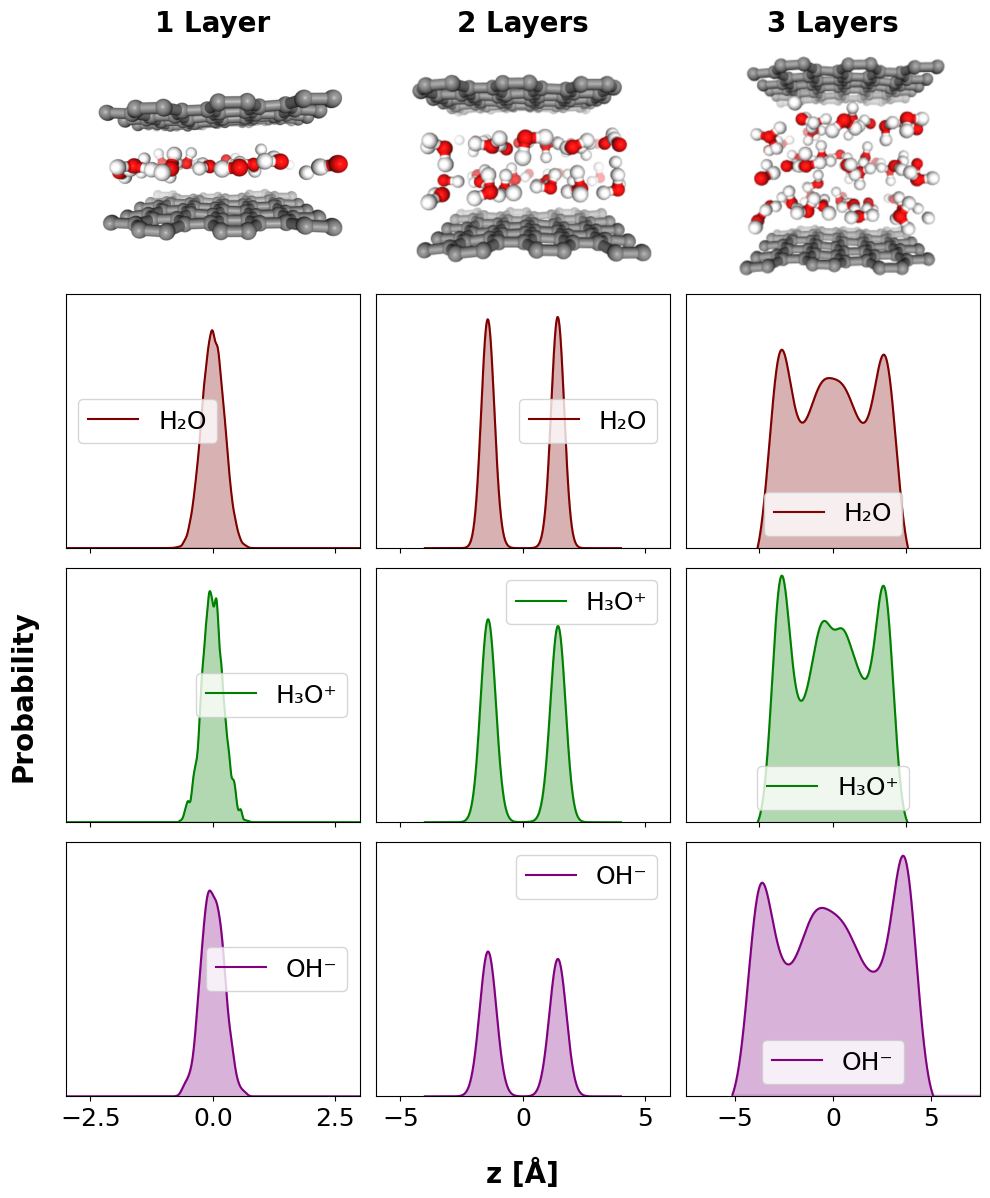

In [ ]:

fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6),
      (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10, 12))

ax1.plot(z_smooth_1_layer, density_H2O_1_layer, color="maroon", label="H₂O")
ax1.fill_betweenx(density_H2O_1_layer, 20, z_smooth_1_layer, color="maroon", alpha=0.3) 
ax1.set_xticklabels([])
ax1.set_yticks([])
ax1.set_ylim(top = 1.1, bottom = 0)
ax1.legend()


ax4.plot(z_smooth_1_layer, density_hydronium_1_layer, color="green", label=unicodeit.replace("H_3O^+"))
ax4.fill_betweenx(density_hydronium_1_layer, 20, z_smooth_1_layer, color="green", alpha=0.3) 
ax4.set_ylabel("Probability", fontweight = "bold", labelpad = 20)
ax4.set_xticklabels([])
ax4.set_yticks([])
ax4.set_ylim(top = 1.1, bottom = 0)
ax4.legend(loc = "center right")


ax7.plot(z_smooth_1_layer, density_hydroxide_1_layer, color="purple", label=unicodeit.replace("OH^-"))
ax7.fill_betweenx(density_hydroxide_1_layer, 10, z_smooth_1_layer, color="purple", alpha=0.3) 
# ax7.set_xlabel("z [Å]", fontweight = "bold", labelpad = 15)
ax7.set_yticks([])
ax7.set_ylim(top = 1.1, bottom = 0)
ax7.legend()


ax1.set_xlim(left = - 3, right = 3)
ax4.set_xlim(left = - 3, right = 3)
ax7.set_xlim(left = - 3, right = 3)

ax1.set_xticks([-2.5,0,2.5])#, fontweight = "bold")
ax4.set_xticks([-2.5,0,2.5])#, fontweight = "bold")
ax7.set_xticks([-2.5,0,2.5])#, fontweight = "bold")

ax1.set_title("1 Layer", pad = 35, fontweight="bold")

ax1.set_xlim(left = -3, right = 3)
ax4.set_xlim(left = -3, right = 3)
ax7.set_xlim(left = -3, right = 3)


#########################################

ax2.plot(z_smooth_2_layers, density_H2O_2_layers, color="maroon", label="H₂O")
ax2.fill_betweenx(density_H2O_2_layers, 20, z_smooth_2_layers, color="maroon", alpha=0.3) 
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_ylim(top = 1.1, bottom = 0)
ax2.legend(loc = "center right")

ax5.plot(z_smooth_2_layers, density_hydronium_2_layers, color="green", label=unicodeit.replace("H_3O^+"))
ax5.fill_betweenx(density_hydronium_2_layers, 20, z_smooth_2_layers, color="green", alpha=0.3) 
ax5.set_xticklabels([])
ax5.set_yticks([])
ax5.set_ylim(top = 1.1, bottom = 0)
ax5.legend(loc = "upper right")

ax8.plot(z_smooth_2_layers, density_hydroxide_2_layers, color="purple", label=unicodeit.replace("OH^-"))
ax8.fill_betweenx(density_hydroxide_2_layers, 10, z_smooth_2_layers, color="purple", alpha=0.3) 
ax8.set_xlabel("z [Å]", fontweight = "bold", labelpad = 20)
ax8.set_yticks([])
ax8.set_ylim(top = 1.4, bottom = 0)
ax8.legend(loc = "upper right")

ax2.set_xlim(left = - 6, right = 6)
ax5.set_xlim(left = - 6, right = 6)
ax8.set_xlim(left = - 6, right = 6)

# ax2.set_xticks([-5,0,5])#, fontweight = "bold")
# ax5.set_xticks([-5,0,5])#, fontweight = "bold")
ax8.set_xticks([-5,0,5])#, fontweight = "bold")

ax2.set_title("2 Layers", loc = "center", pad = 23, fontweight="bold")


#########################################

ax3.plot(z_smooth_3_layers, density_H2O_3_layers, color="maroon", label="H₂O")
ax3.fill_betweenx(density_H2O_3_layers, 20, z_smooth_3_layers, color="maroon", alpha=0.3) 
ax3.set_xticklabels([])
ax3.set_yticks([])
ax3.legend(loc = "lower center")
ax3.set_ylim(bottom = 0.09, top = 1.1)
ax3.set_xlim(left = -10, right = 10)
ax3.set_xticks([-5,0,5])

ax6.plot(z_smooth_3_layers, density_hydronium_3_layers, color="green", label=unicodeit.replace("H_3O^+"))
ax6.fill_betweenx(density_hydronium_3_layers, 20, z_smooth_3_layers, color="green", alpha=0.3) 
ax6.set_xticklabels([])
ax6.set_yticks([])
ax6.set_xticks([-5,0,5])
ax6.legend(loc = "lower center")
ax6.set_ylim(bottom = 0.03, top = 1.03)
ax6.set_xlim(left = -10, right = 10)

ax9.plot(z_smooth_3_layers, density_hydroxide_3_layers, color="purple", label=unicodeit.replace("OH^-"))
ax9.fill_betweenx(density_hydroxide_3_layers, 10, z_smooth_3_layers, color="purple", alpha=0.3) 
# ax9.set_xlabel("z [Å]", fontweight = "bold", labelpad = 15)
ax9.set_yticks([])
ax9.legend(loc = "lower center")

# ax3.set_xlim(left = - 5, right = 5)
# ax6.set_xlim(left = - 5, right = 5)
# ax9.set_xlim(left = - 5, right = 5)

# ax3.set_xticks([-5,0,5])#, fontweight = "bold")
# ax6.set_xticks([-5,0,5])#, fontweight = "bold")
ax9.set_xticks([-5,0,5])#, fontweight = "bold")
ax9.set_ylim(bottom = 0.05, top = 1.05)
ax9.set_xlim(left = -7.5, right = 7.5)

ax3.set_title("3 Layers", pad = 15, fontweight="bold")

ax_image = ax1.inset_axes([0.1, 1.05, 0.9, 0.9]) 
ax_image.imshow(images[0])
ax_image.axis("off")  

ax_image = ax2.inset_axes([0.08, 1.05, 0.9, 0.9]) 
ax_image.imshow(images[1])
ax_image.axis("off") 

ax_image = ax3.inset_axes([0.08, 1.05, 0.9, 0.9]) 
ax_image.imshow(images[2])
ax_image.axis("off") 

plt.tight_layout()

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/plots_for_report/density_profile_1_2_and_3_layers_combined', dpi=300, bbox_inches='tight')

plt.show()


# Hydroxides

In [ ]:
layer_1_hydroxide_traj = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/layers_1_hydroxide/prod-traj-0.xyz", index = '::100')

len(layer_1_hydroxide_traj)

504

## 5 Layers

In [ ]:
gra_water_5_layer_defects_traj = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/layers_5_hydronium/prod-traj-0.xyz', index = "::100")

In [12]:
gra_water_5_layer_defects_traj[0].wrap()

In [11]:
nv.show_ase(gra_water_5_layer_defects_traj[0])

NGLWidget()

- Number of atoms in system

In [6]:
len(gra_water_5_layer_defects_traj)

1001

- Identify charged species

In [7]:
hydronium_counts = []
hydroxide_counts = []
water_counts = []

hydronium_z = []
hydroxide_z = []
neutral_water_z = []
    
for atoms in gra_water_5_layer_defects_traj:

    positions = atoms.positions
    oxygen_indices = [atom.index for atom in atoms if atom.symbol == "O"]
    hydrogen_indices = [atom.index for atom in atoms if atom.symbol == "H"]
    
    # Extract all position coordinates by accessing the indicies identified above
    oxygen_positions = positions[oxygen_indices]
    hydrogen_positions = positions[hydrogen_indices]
    
    # Compute O-H distances
    distances = cdist(hydrogen_positions, oxygen_positions)

    # Assign each Hydrogen atom to its closest oxygen
    closest_oxygen_indices = np.argmin(distances, axis=1)  

    # Count how many closest Hydrogen atoms are assigned to each Oxygen
    hydrogen_count_per_oxygen = Counter(closest_oxygen_indices)

    # Classify species based on number of closest Hydrogen atoms

    water_count = 0
    hydroxide_count = 0
    hydronium_count = 0
    
    for h in hydrogen_count_per_oxygen.values():
        if h == 2:
            water_count += 1  
        elif h==1:
            hydroxide_count +=1
        elif h==3:
            hydronium_count +=1
        
    hydronium_counts.append(hydronium_count)
    hydroxide_counts.append(hydroxide_count)
    water_counts.append(water_count)
    
    # Extracting the z positions for the system
    
    for i, O_idx in enumerate(oxygen_indices):
        num_H = hydrogen_count_per_oxygen.get(i, 0) 
        if num_H == 3:
            hydronium_z.append(positions[O_idx, 2])
        elif num_H == 2:
            neutral_water_z.append(positions[O_idx, 2])
        elif num_H == 1:
            hydroxide_z.append(positions[O_idx, 2])

In [8]:
print("Number of H₃O⁺ in system: {}".format(hydronium_counts))
print("Number of OH⁻ in system: {}". format(hydroxide_counts))
print("Number of H₂O in system: {}".format(water_counts))

Number of H₃O⁺ in system: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

- Centre on middle of graphene sheets

In [9]:
z_center_of_graphene_list = []
for atoms in gra_water_5_layer_defects_traj:
    
    carbon_atoms = atoms[atoms.symbols == 'C']

    center_of_mass = carbon_atoms.get_center_of_mass()

    z_center_of_graphene = center_of_mass[2]
    
    z_center_of_graphene_list.append(z_center_of_graphene)

In [10]:
hydronium_z_centred = np.array(hydronium_z) - np.repeat(np.array(z_center_of_graphene_list), np.mean(hydronium_counts))
hydroxide_z_centred = np.array(hydroxide_z) - np.repeat(np.array(z_center_of_graphene_list), np.mean(hydroxide_counts))
neutral_water_z_centred = np.array(neutral_water_z) - np.repeat(np.array(z_center_of_graphene_list), np.mean(water_counts))

- Visualizing hydroxide density along the z-axis 

In [ ]:
# Define z-axis range for KDE smoothing
z_smooth = np.linspace(min(hydronium_z_centred + hydroxide_z_centred), max(hydronium_z_centred + hydroxide_z_centred), 200)

# Compute KDE (smoothed density distributions)
kde_H3O = gaussian_kde(hydronium_z_centred, bw_method="scott")
kde_OH = gaussian_kde(hydroxide_z_centred, bw_method="scott")
kde_H2O = gaussian_kde(neutral_water_z_centred, bw_method="scott")

# Normalize densities
density_hydronium = kde_H3O(z_smooth)
density_hydroxide = kde_OH(z_smooth)
density_H2O = kde_H2O(z_smooth)

density_hydronium /= np.trapz(density_hydronium, z_smooth)
density_hydroxide /= np.trapz(density_hydroxide, z_smooth)
density_H2O /= np.trapz(density_H2O, z_smooth)

fig, ((ax1, ax2)) = plt.subplots(3, 1, figsize=(6, 10), sharex=True)

ax1.plot(z_smooth, density_hydronium, color="red", label="H₃O⁺ (Hydronium)")
ax1.set_ylabel("Density")
ax1.legend()


ax2.plot(z_smooth, density_H2O, color="green", label="H₂O (Water)")
ax2.set_xlabel("z (Å)")
ax2.set_ylabel("Density")
ax2.legend()

plt.tight_layout()

plt.xlim(left = - 2.5, right = 2.5)
plt.show()

# Energy

Free energy profiles and water structuring of hydronium and hydroxide near graphene sheets (Figure 2 in paper)

    - Analyse systems with 3-5 water layers, must have interfacial layers and 'core'/non interfacial layers.


## Calculate distance from closest graphene sheet!

## Include neutral waters with dashed lines!

- Free energies against position

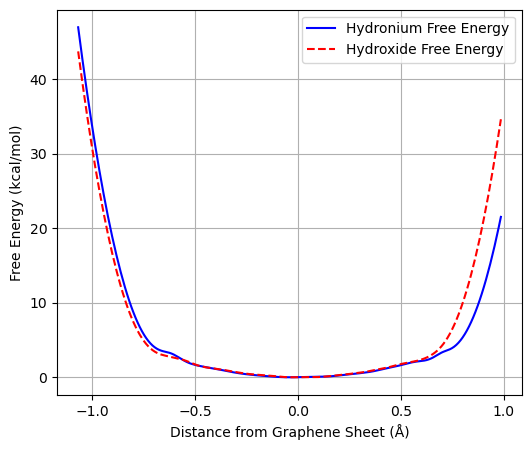

In [ ]:
kB = 0.001987  # Boltzmann constant in kcal/mol/K
T = 300 

z_smooth = np.linspace(min(hydronium_z_centred + hydroxide_z_centred), max(hydronium_z_centred + hydroxide_z_centred), 200)

hydronium_free_energy = -kB * T * np.log(density_hydronium)
hydroxide_free_energy = -kB * T * np.log(density_hydroxide)

hydronium_free_energy -= np.min(hydronium_free_energy)
hydroxide_free_energy -= np.min(hydroxide_free_energy)

plt.figure(figsize=(6, 5))
plt.plot(z_smooth, hydronium_free_energy, label="Hydronium Free Energy", color="blue")
plt.plot(z_smooth, hydroxide_free_energy, label="Hydroxide Free Energy", color="red", linestyle = '--')
plt.xlabel("Distance from Graphene Sheet (Å)")
plt.ylabel("Free Energy (kcal/mol)")
plt.legend()
plt.grid()
plt.show()

## Could look at plot which shows different hydrogen bonding behaviour between Hydroxide and Hydronium systems.

In [ ]:
gra_water_defects_md_log =  pd.read_fwf('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/Fine_Tuning_MACE/md_runs_data_files/equi-1-md.log')

In [30]:
gra_water_defects_md_log

,Time[ps],Etot[eV],Epot[eV],Ekin[eV],T[K]
0,0.0,-24248.047,-24249.547,1.500,322.3
1,0.1,-24247.936,-24249.051,1.115,239.6
2,0.2,-24247.806,-24249.055,1.249,268.4
3,0.3,-24247.701,-24249.010,1.309,281.2
4,0.4,-24247.675,-24249.160,1.486,319.2
...,...,...,...,...,...
221,22.1,-24247.220,-24248.572,1.352,290.5
222,22.2,-24247.434,-24249.111,1.678,360.6
223,22.3,-24247.556,-24248.803,1.247,268.0
224,22.4,-24247.714,-24249.113,1.400,300.8
